# Data Modelling (IS411) - UTS Semester Pendek TA 2024/2025


In [1]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive/')

# Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
dataset_folder = '/content/drive/MyDrive/Kuliah/Data_Modelling/'
# df = pd.read_csv(dataset_folder+'china_water_pollution_data.csv') # Run in Google Colab
df = pd.read_csv('./china_water_pollution_data.csv') # If run in local
# Print Table with all column and only 10 row
pd.set_option('display.max_columns', None)
df.head(5)

Province      City  Monitoring_Station   Latitude   Longitude        Date  \
0  Zhejiang    Ningbo    Ningbo_Station_2  25.523836  122.622036  2023-06-01   
1   Sichuan  Mianyang  Mianyang_Station_1  32.243099  112.888760  2023-03-05   
2  Zhejiang    Ningbo    Ningbo_Station_8  29.996179  124.744859  2023-07-13   
3   Beijing   Beijing  Beijing_Station_10  29.976437  118.274846  2023-02-17   
4   Sichuan   Chengdu   Chengdu_Station_1  43.524720  121.666111  2023-03-06   

   Water_Temperature_C    pH  Dissolved_Oxygen_mg_L  Conductivity_uS_cm  \
0                22.48  6.93                   9.30              652.30   
1                27.33  6.89                   8.14              357.53   
2                21.04  6.02                   5.34              519.69   
3                16.62  7.31                  10.06              593.13   
4                21.81  7.77                   7.93              656.46   

   Turbidity_NTU  Nitrate_mg_L  Nitrite_mg_L  Ammonia_N_mg_L  \
0           0.85          2.14         0.030            0.38   
1           4.49          2.06         0.015            0.38   
2          17.46          2.11         0.029            0.30   
3           7.38          1.90         0.014            0.20   
4           3.70          1.80         0.019            0.22   

   Total_Phosphorus_mg_L  Total_Nitrogen_mg_L  COD_mg_L  BOD_mg_L  \
0                  0.074                 2.71     15.38      1.39   
1                  0.147                 3.15     16.82      2.98   
2                  0.021                 3.39     17.31      2.65   
3                  0.155                 2.91     17.95      5.18   
4                  0.152                 3.45     20.10      3.47   

   Heavy_Metals_Pb_ug_L  Heavy_Metals_Cd_ug_L  Heavy_Metals_Hg_ug_L  \
0                  6.90                  0.66                  0.02   
1                  4.68                  0.39                  0.10   
2                  3.24                  0.27                  0.11   
3                  3.20                  0.67                  0.11   
4                  2.01                  0.34                  0.14   

   Coliform_Count_CFU_100mL  Water_Quality_Index Pollution_Level  \
0                        87                36.64       Very Poor   
1                       116                66.25       Excellent   
2                       110                98.69            Poor   
3                        99                71.32            Poor   
4                        82                16.12       Excellent   

                         Remarks  
0  High pollution spike detected  
1  High pollution spike detected  
2  High pollution spike detected  
3         Monitoring recommended  
4                            NaN

# Exploratory Data Analysis

## Initial Data Inspection

In [3]:
# Check rows and columns
df.shape

(3000, 25)

In [4]:
# Check data type on column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province                  3000 non-null   object 
 1   City                      3000 non-null   object 
 2   Monitoring_Station        3000 non-null   object 
 3   Latitude                  3000 non-null   float64
 4   Longitude                 3000 non-null   float64
 5   Date                      3000 non-null   object 
 6   Water_Temperature_C       3000 non-null   float64
 7   pH                        3000 non-null   float64
 8   Dissolved_Oxygen_mg_L     3000 non-null   float64
 9   Conductivity_uS_cm        3000 non-null   float64
 10  Turbidity_NTU             3000 non-null   float64
 11  Nitrate_mg_L              3000 non-null   float64
 12  Nitrite_mg_L              3000 non-null   float64
 13  Ammonia_N_mg_L            3000 non-null   float64
 14  Total_Ph

In [5]:
# Check null value
print("\nCheck null value:")
print(df.isnull().sum())


Check null value:
Province                      0
City                          0
Monitoring_Station            0
Latitude                      0
Longitude                     0
Date                          0
Water_Temperature_C           0
pH                            0
Dissolved_Oxygen_mg_L         0
Conductivity_uS_cm            0
Turbidity_NTU                 0
Nitrate_mg_L                  0
Nitrite_mg_L                  0
Ammonia_N_mg_L                0
Total_Phosphorus_mg_L         0
Total_Nitrogen_mg_L           0
COD_mg_L                      0
BOD_mg_L                      0
Heavy_Metals_Pb_ug_L          0
Heavy_Metals_Cd_ug_L          0
Heavy_Metals_Hg_ug_L          0
Coliform_Count_CFU_100mL      0
Water_Quality_Index           0
Pollution_Level               0
Remarks                     752
dtype: int64


In [6]:
# Check duplicated data
print(df.duplicated().sum())

0


## Decriptive Statistics

In [7]:
print(df.describe().round(2))

       Latitude  Longitude  Water_Temperature_C       pH  \
count   3000.00    3000.00              3000.00  3000.00   
mean      32.30     112.55                20.05     7.03   
std        7.22       7.24                 4.92     0.50   
min       20.01     100.02                 3.39     5.34   
25%       25.99     106.26                16.71     6.70   
50%       32.29     112.44                19.98     7.02   
75%       38.53     118.96                23.31     7.36   
max       45.00     125.00                36.77     8.76   

       Dissolved_Oxygen_mg_L  Conductivity_uS_cm  Turbidity_NTU  Nitrate_mg_L  \
count                3000.00             3000.00        3000.00       3000.00   
mean                    8.01              496.56           4.95          1.98   
std                     1.97               98.87           4.91          0.51   
min                     1.47              136.85           0.00          0.23   
25%                     6.66              430.24      

## Univariate Analysis

### Show Distribution

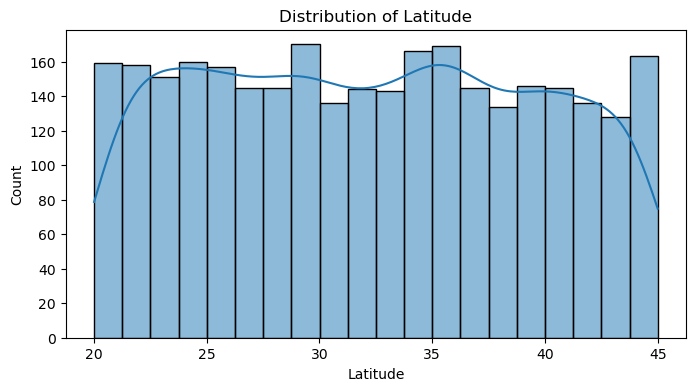

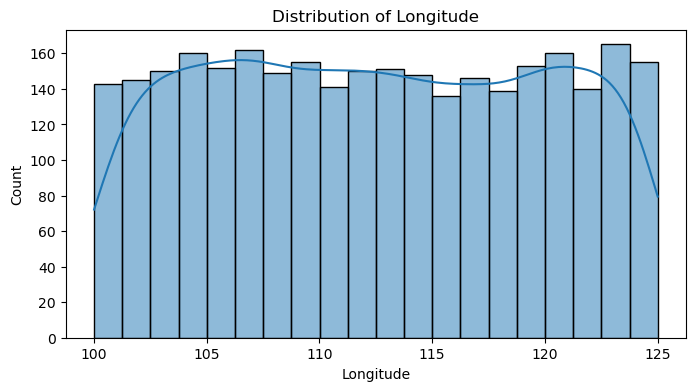

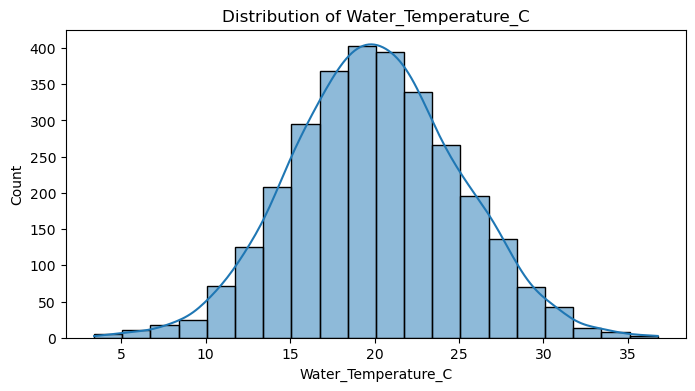

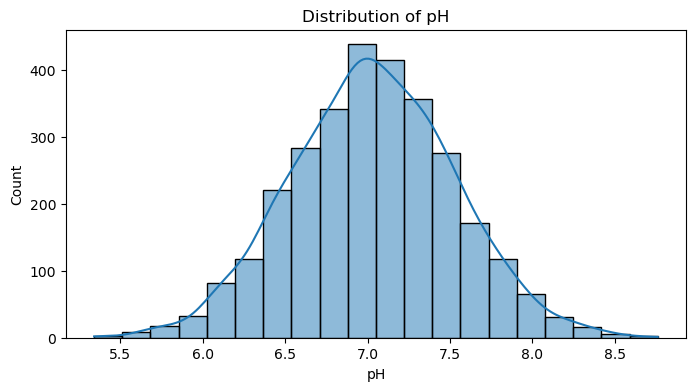

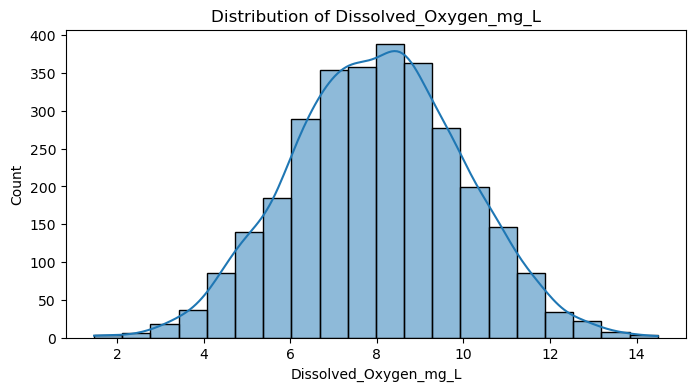

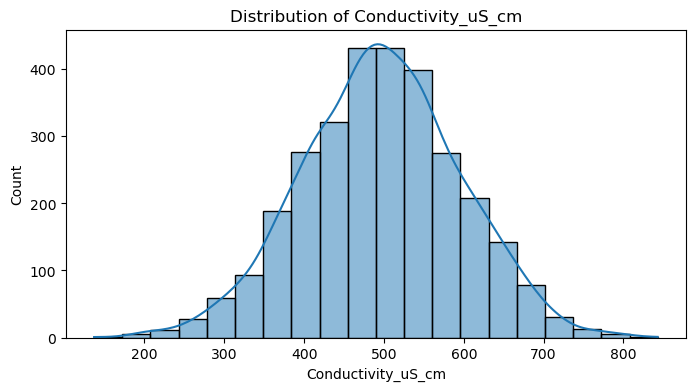

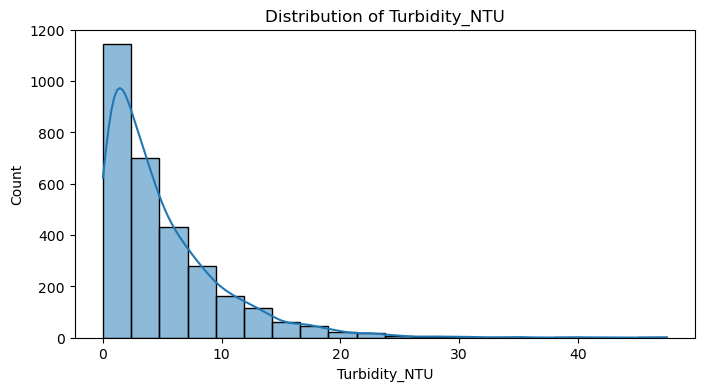

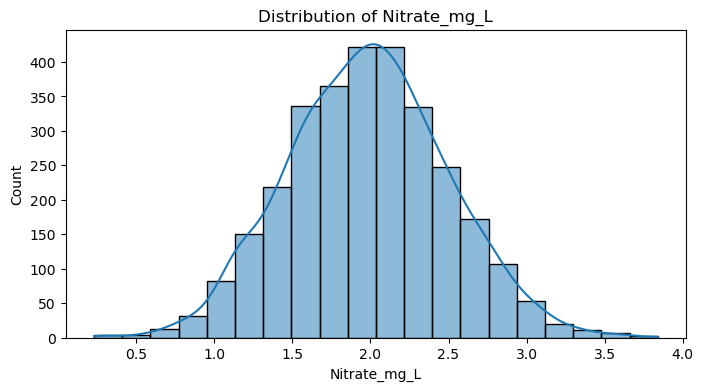

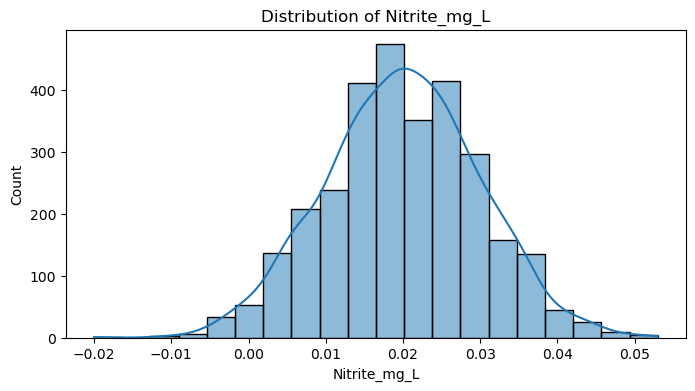

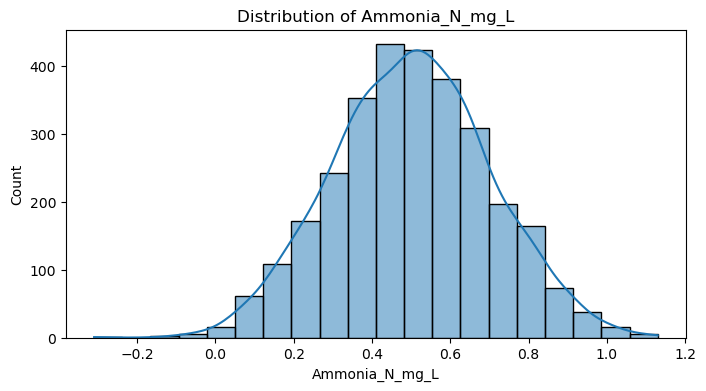

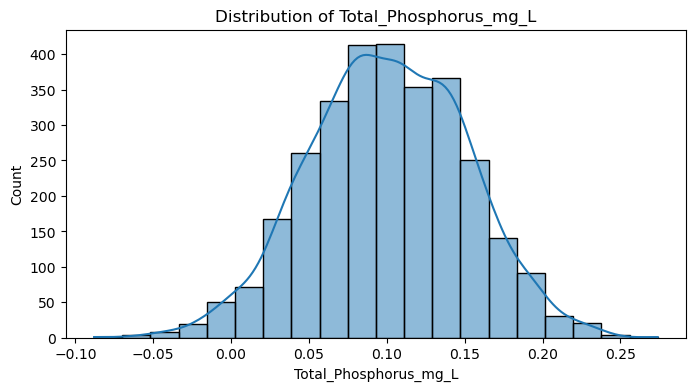

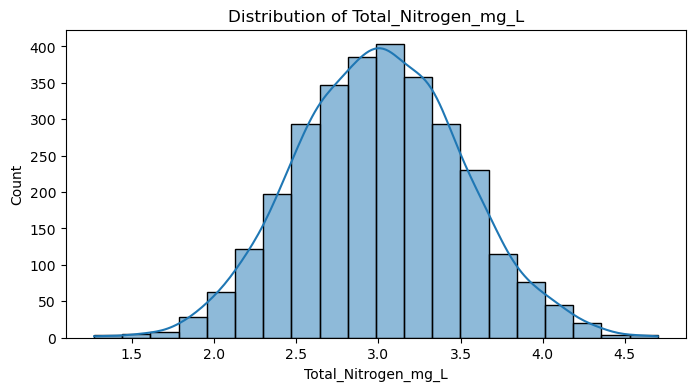

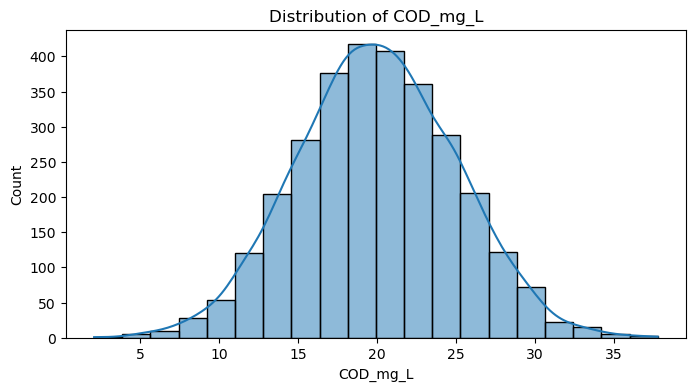

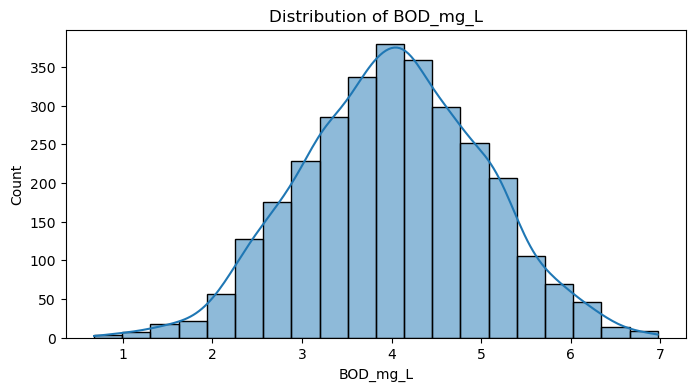

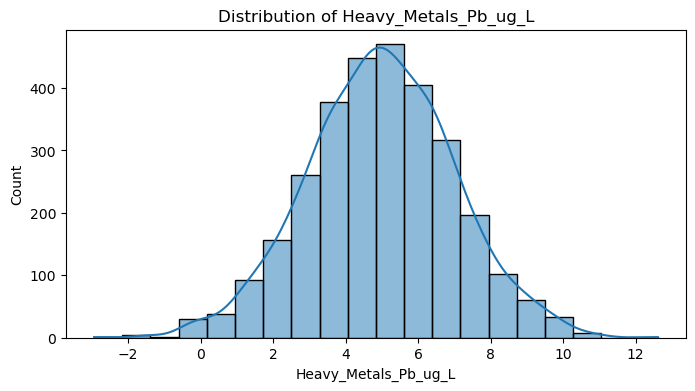

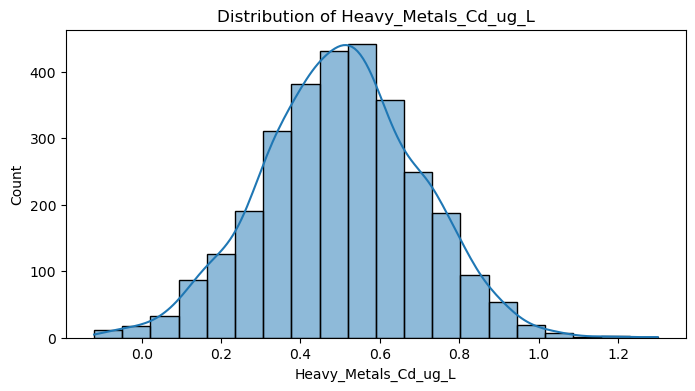

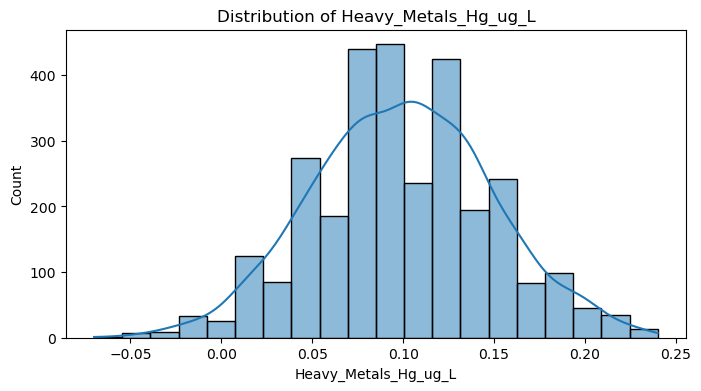

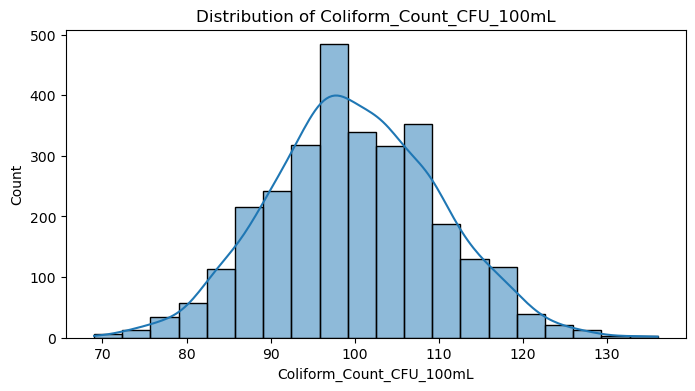

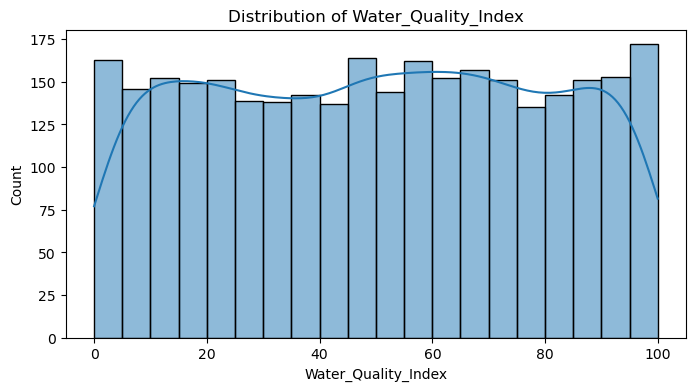

In [8]:
# Plot histograms for numerical variables
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

### Check Outliers

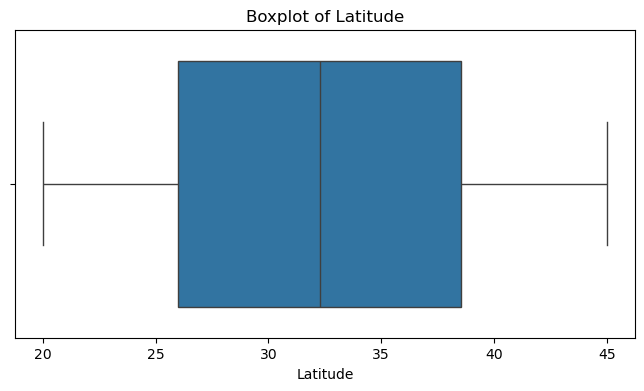

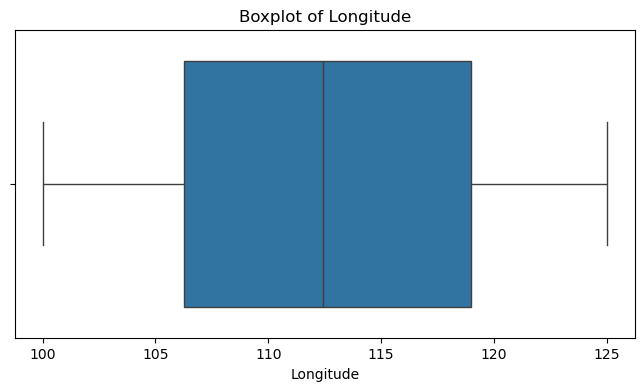

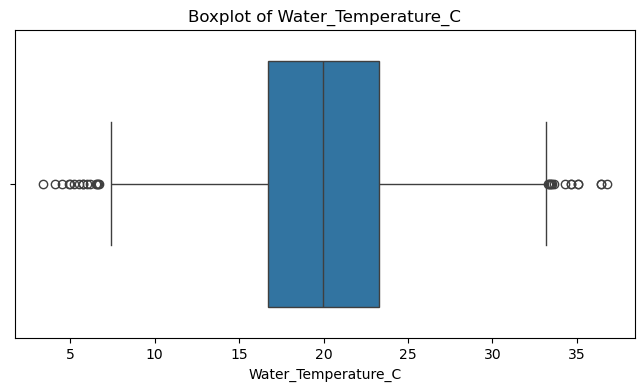

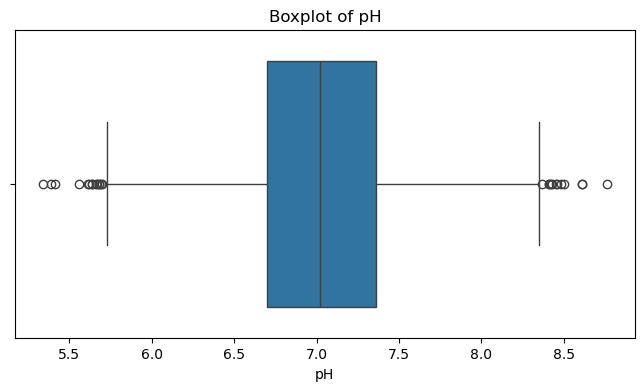

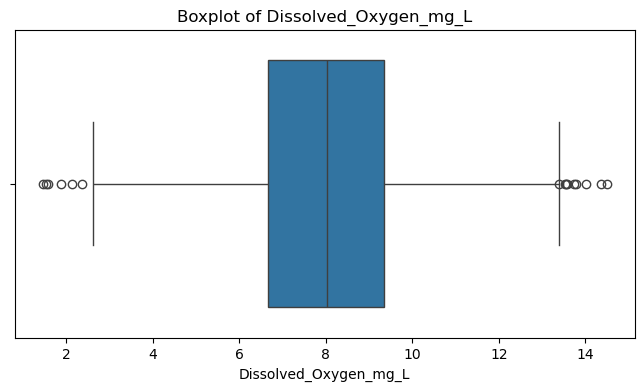

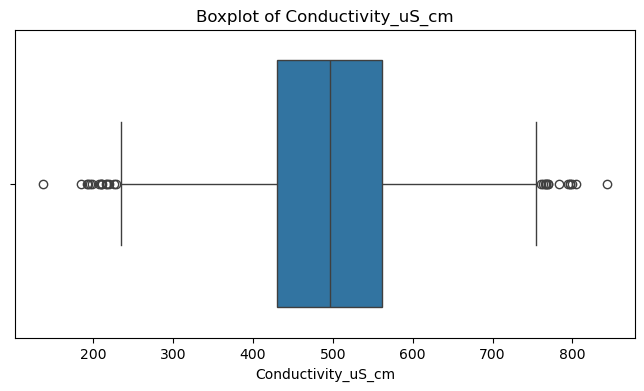

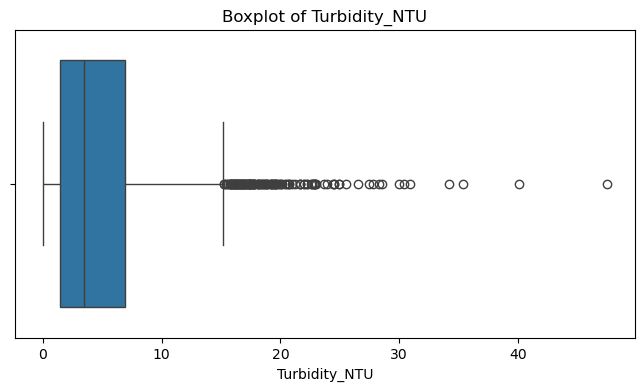

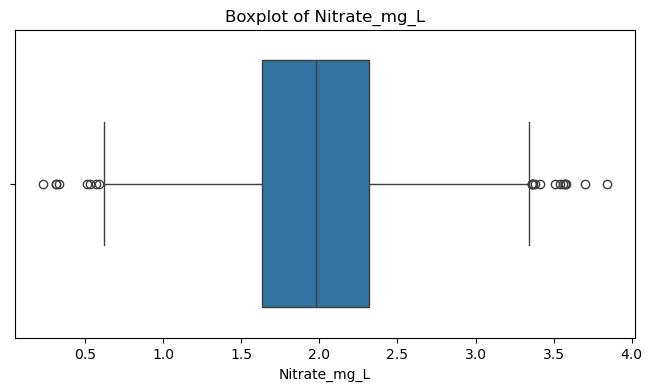

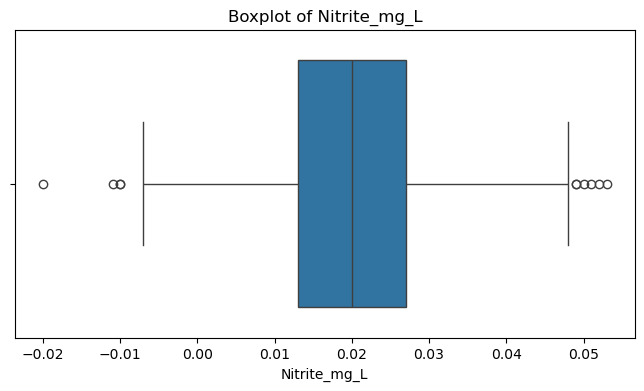

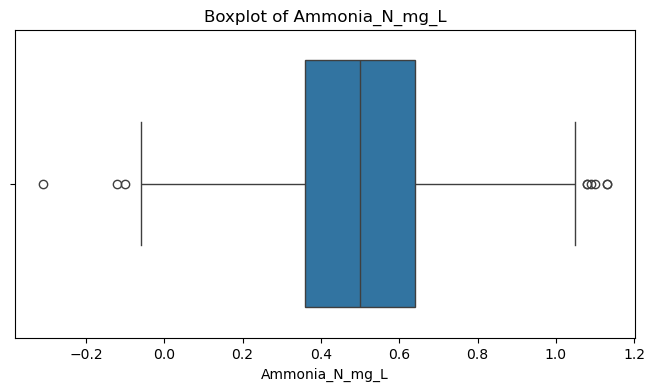

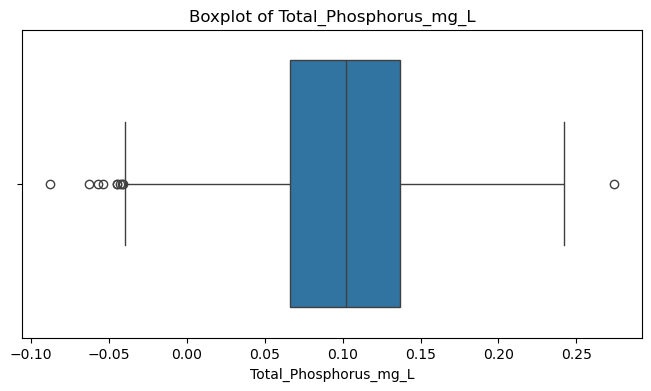

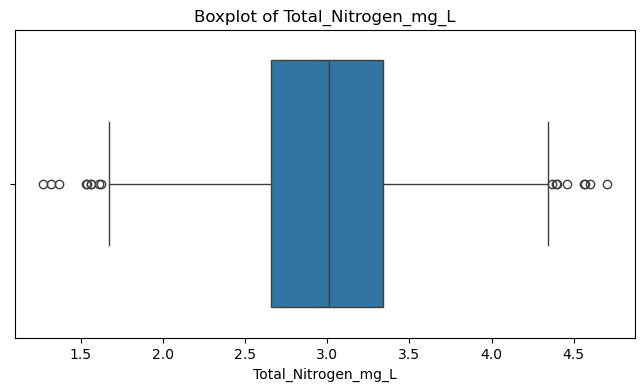

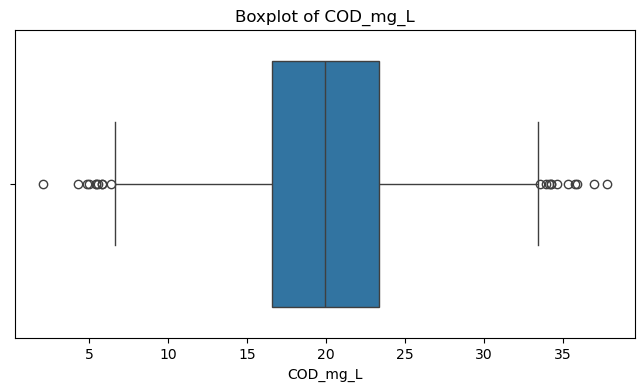

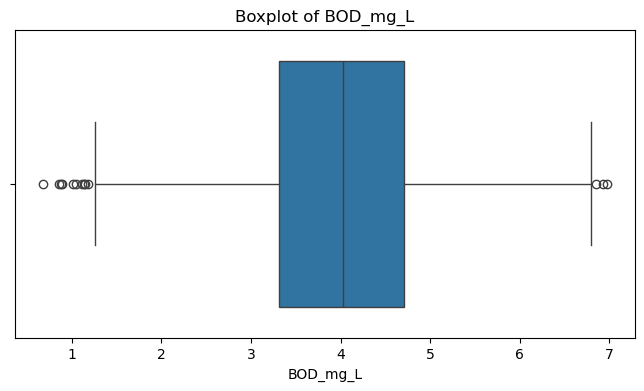

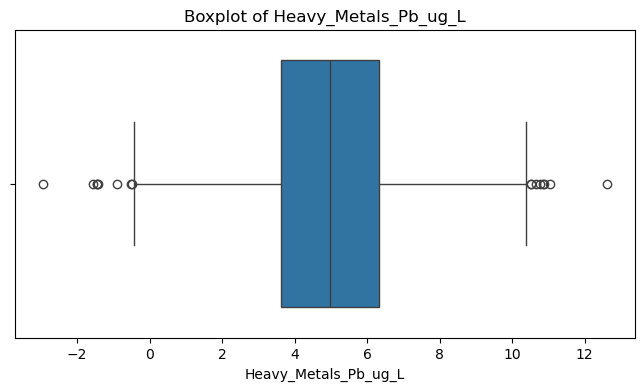

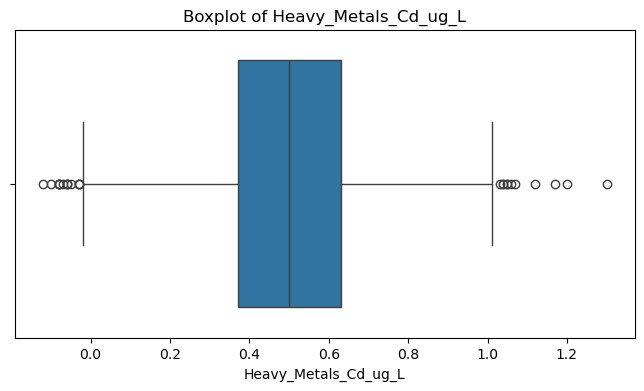

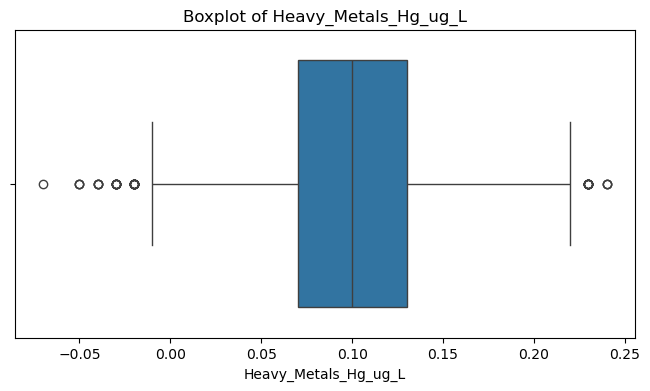

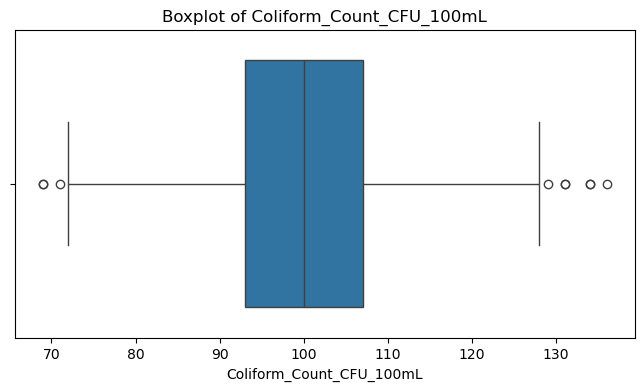

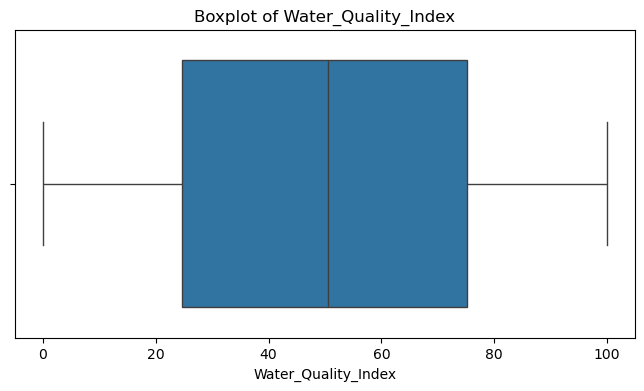

In [9]:
# Check outlier with boxplot on each columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

### Check Location & Date Columns

In [10]:
# Check Province
print("Values in Province:", df['Province'].unique())
print(df['Province'].value_counts())

# Check City Grouped By Province
print("\nValues in City Grouped By Province:")
print(df.groupby('Province')['City'].unique())

# Check Monitoring Station Grouped By City
grouped = df.groupby('City')['Monitoring_Station'].unique().reset_index()
print(grouped.to_string(index=False))


Values in Province: ['Zhejiang' 'Sichuan' 'Beijing' 'Yunnan' 'Jiangsu' 'Shandong' 'Henan'
 'Hubei' 'Guangdong' 'Shanghai']
Province
Shanghai     312
Sichuan      311
Zhejiang     304
Guangdong    301
Shandong     300
Beijing      299
Yunnan       296
Jiangsu      293
Hubei        292
Henan        292
Name: count, dtype: int64

Values in City Grouped By Province:
Province
Beijing                  [Beijing]
Guangdong    [Shenzhen, Guangzhou]
Henan         [Luoyang, Zhengzhou]
Hubei             [Yichang, Wuhan]
Jiangsu          [Nanjing, Suzhou]
Shandong          [Jinan, Qingdao]
Shanghai                [Shanghai]
Sichuan        [Mianyang, Chengdu]
Yunnan             [Dali, Kunming]
Zhejiang        [Ningbo, Hangzhou]
Name: City, dtype: object
     City                                                                                                                                                                                                  Monitoring_Station
  Beijing                   

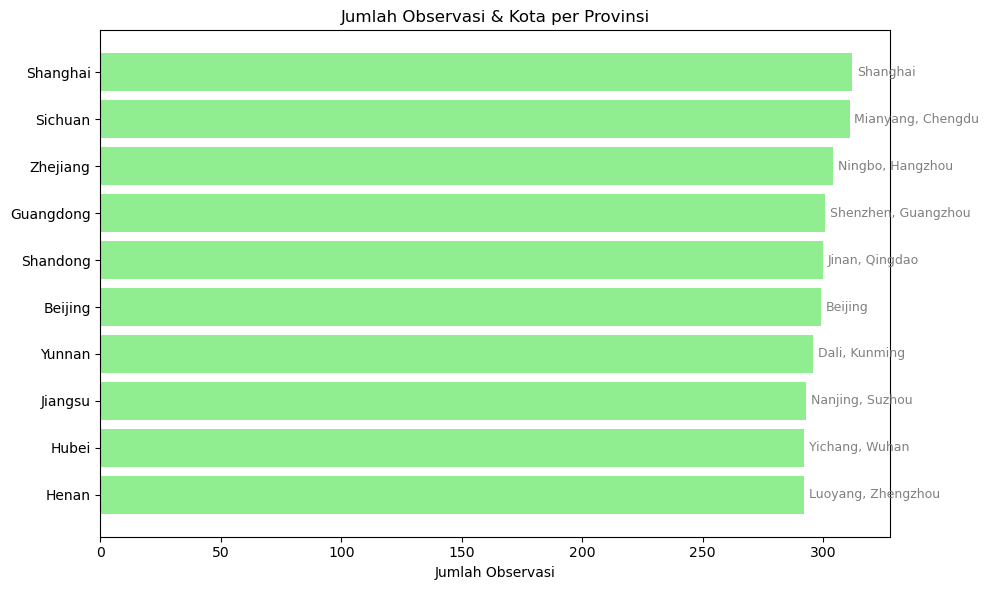

In [11]:
# Data kota per provinsi
province_to_cities = df.groupby('Province')['City'].unique().to_dict()

# Hitung jumlah observasi per provinsi
province_counts = df['Province'].value_counts().to_dict()

# Gabungkan ke dalam label anotasi
labels = [", ".join(province_to_cities[p]) for p in province_counts.keys()]

plt.figure(figsize=(10, 6))
bars = plt.barh(list(province_counts.keys()), list(province_counts.values()), color='lightgreen')

# Tambahkan label kota di sebelah kanan bar
for bar, label in zip(bars, labels):
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, label,
             va='center', fontsize=9, color='gray')

plt.xlabel("Jumlah Observasi")
plt.title("Jumlah Observasi & Kota per Provinsi")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [12]:
# Extract time component
df_timeseries = df.copy()
df_timeseries['Date'] = pd.to_datetime(df_timeseries['Date'])
df_timeseries['Month'] = df_timeseries['Date'].dt.to_period('M').astype(str)

# Extract provinces
provinces = df_timeseries['Province'].unique()

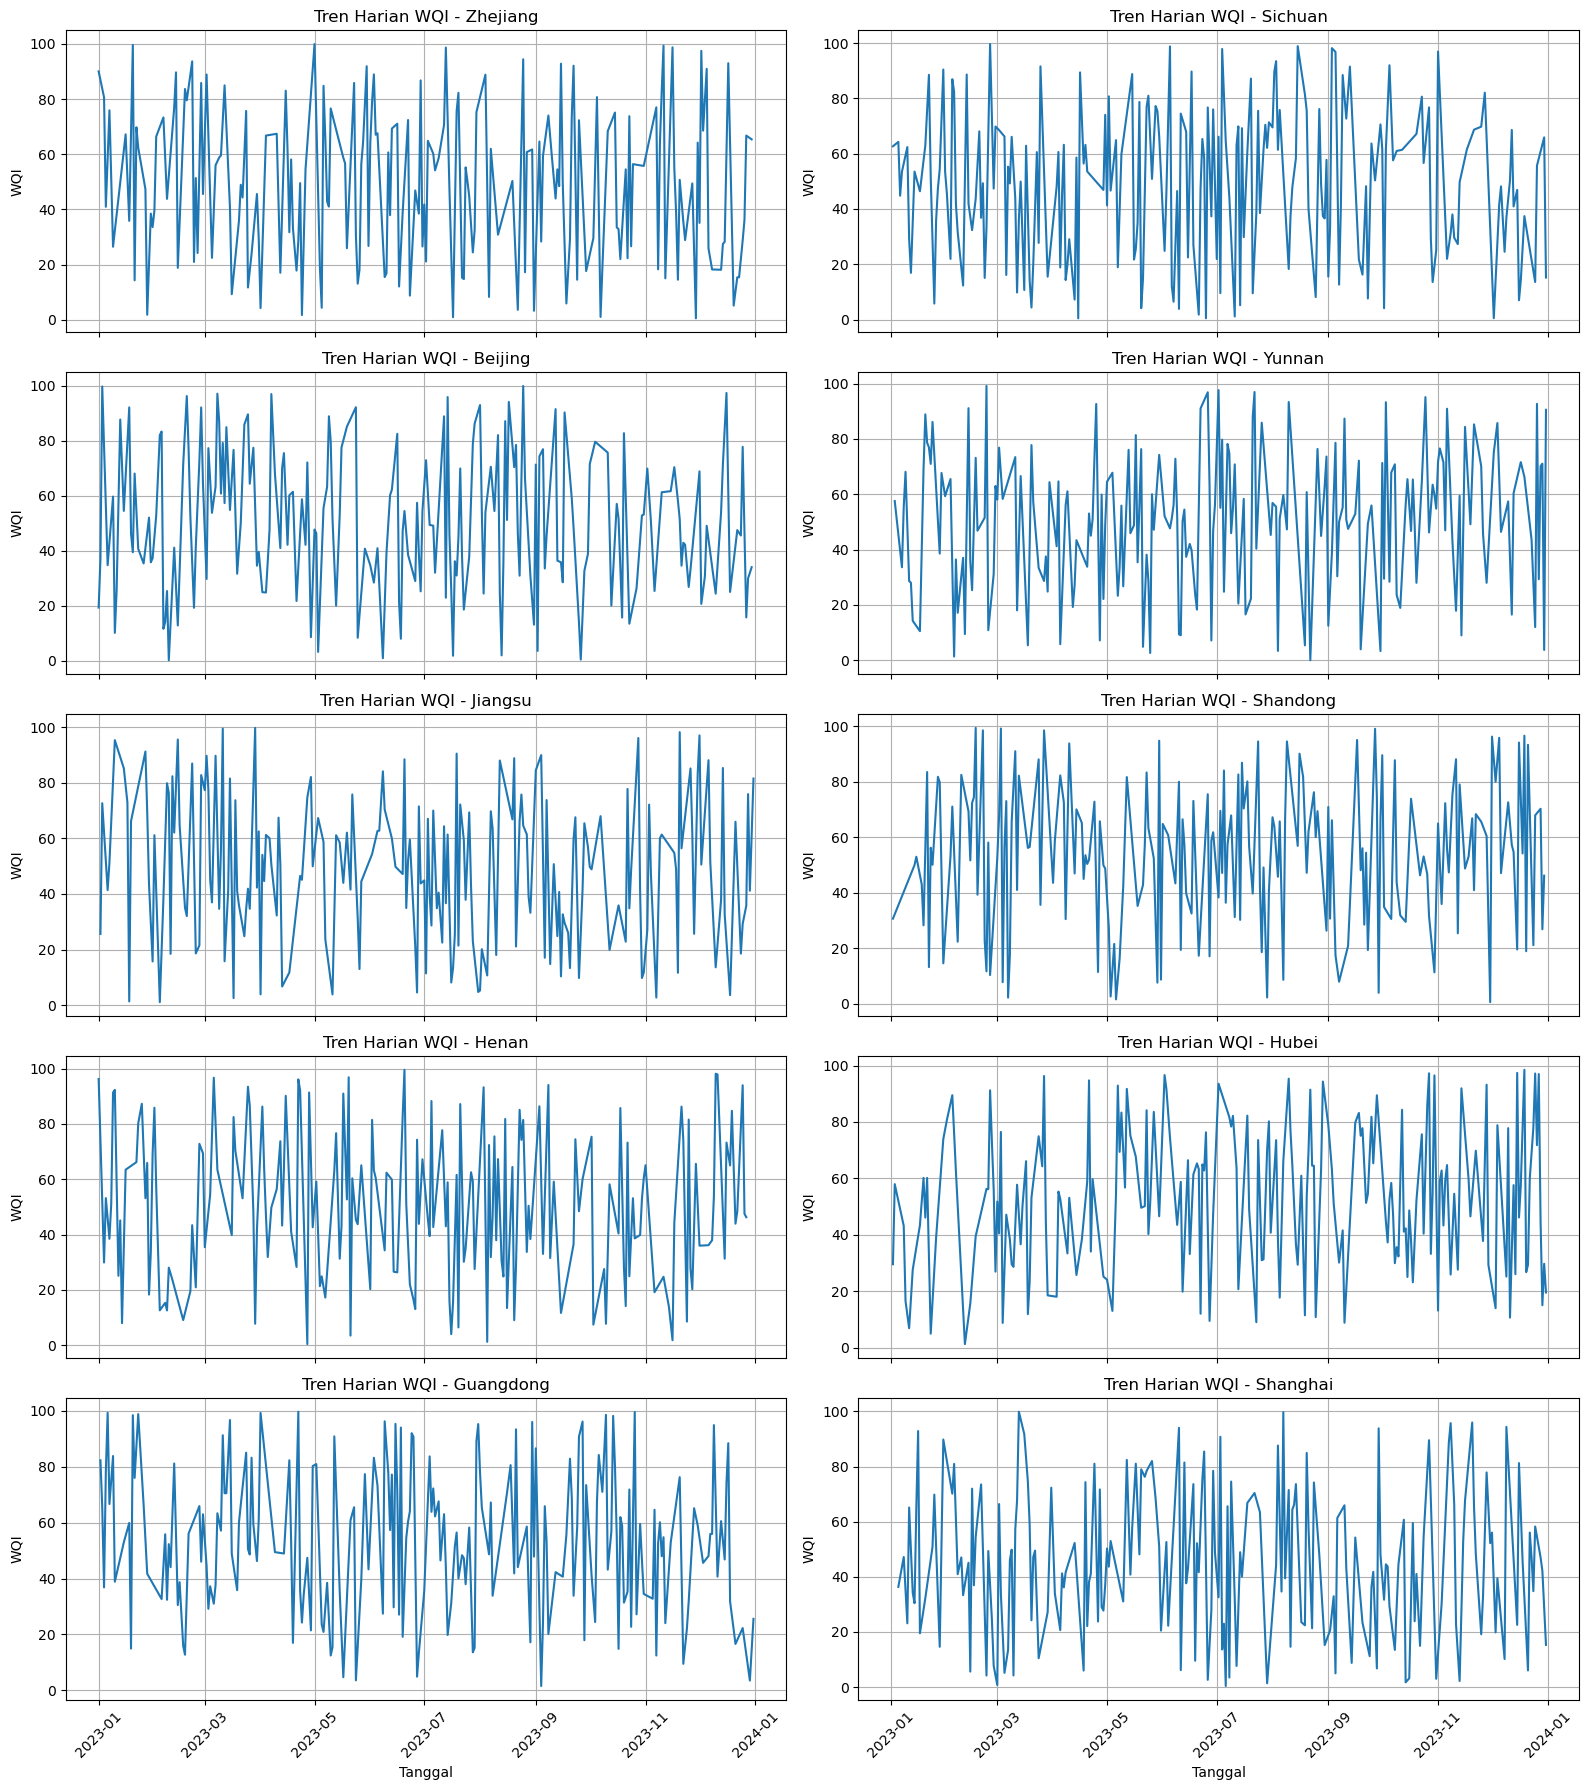

In [13]:
# Check Daily Date to WQI per Provinces
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 18), sharex=True)
axes = axes.flatten()

for i, province in enumerate(provinces):
    province_daily = df_timeseries[df_timeseries['Province'] == province].groupby('Date')['Water_Quality_Index'].mean().reset_index()
    sns.lineplot(data=province_daily, x='Date', y='Water_Quality_Index', ax=axes[i])
    axes[i].set_title(f'Tren Harian WQI - {province}')
    axes[i].set_ylabel('WQI')
    axes[i].set_xlabel('Tanggal')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

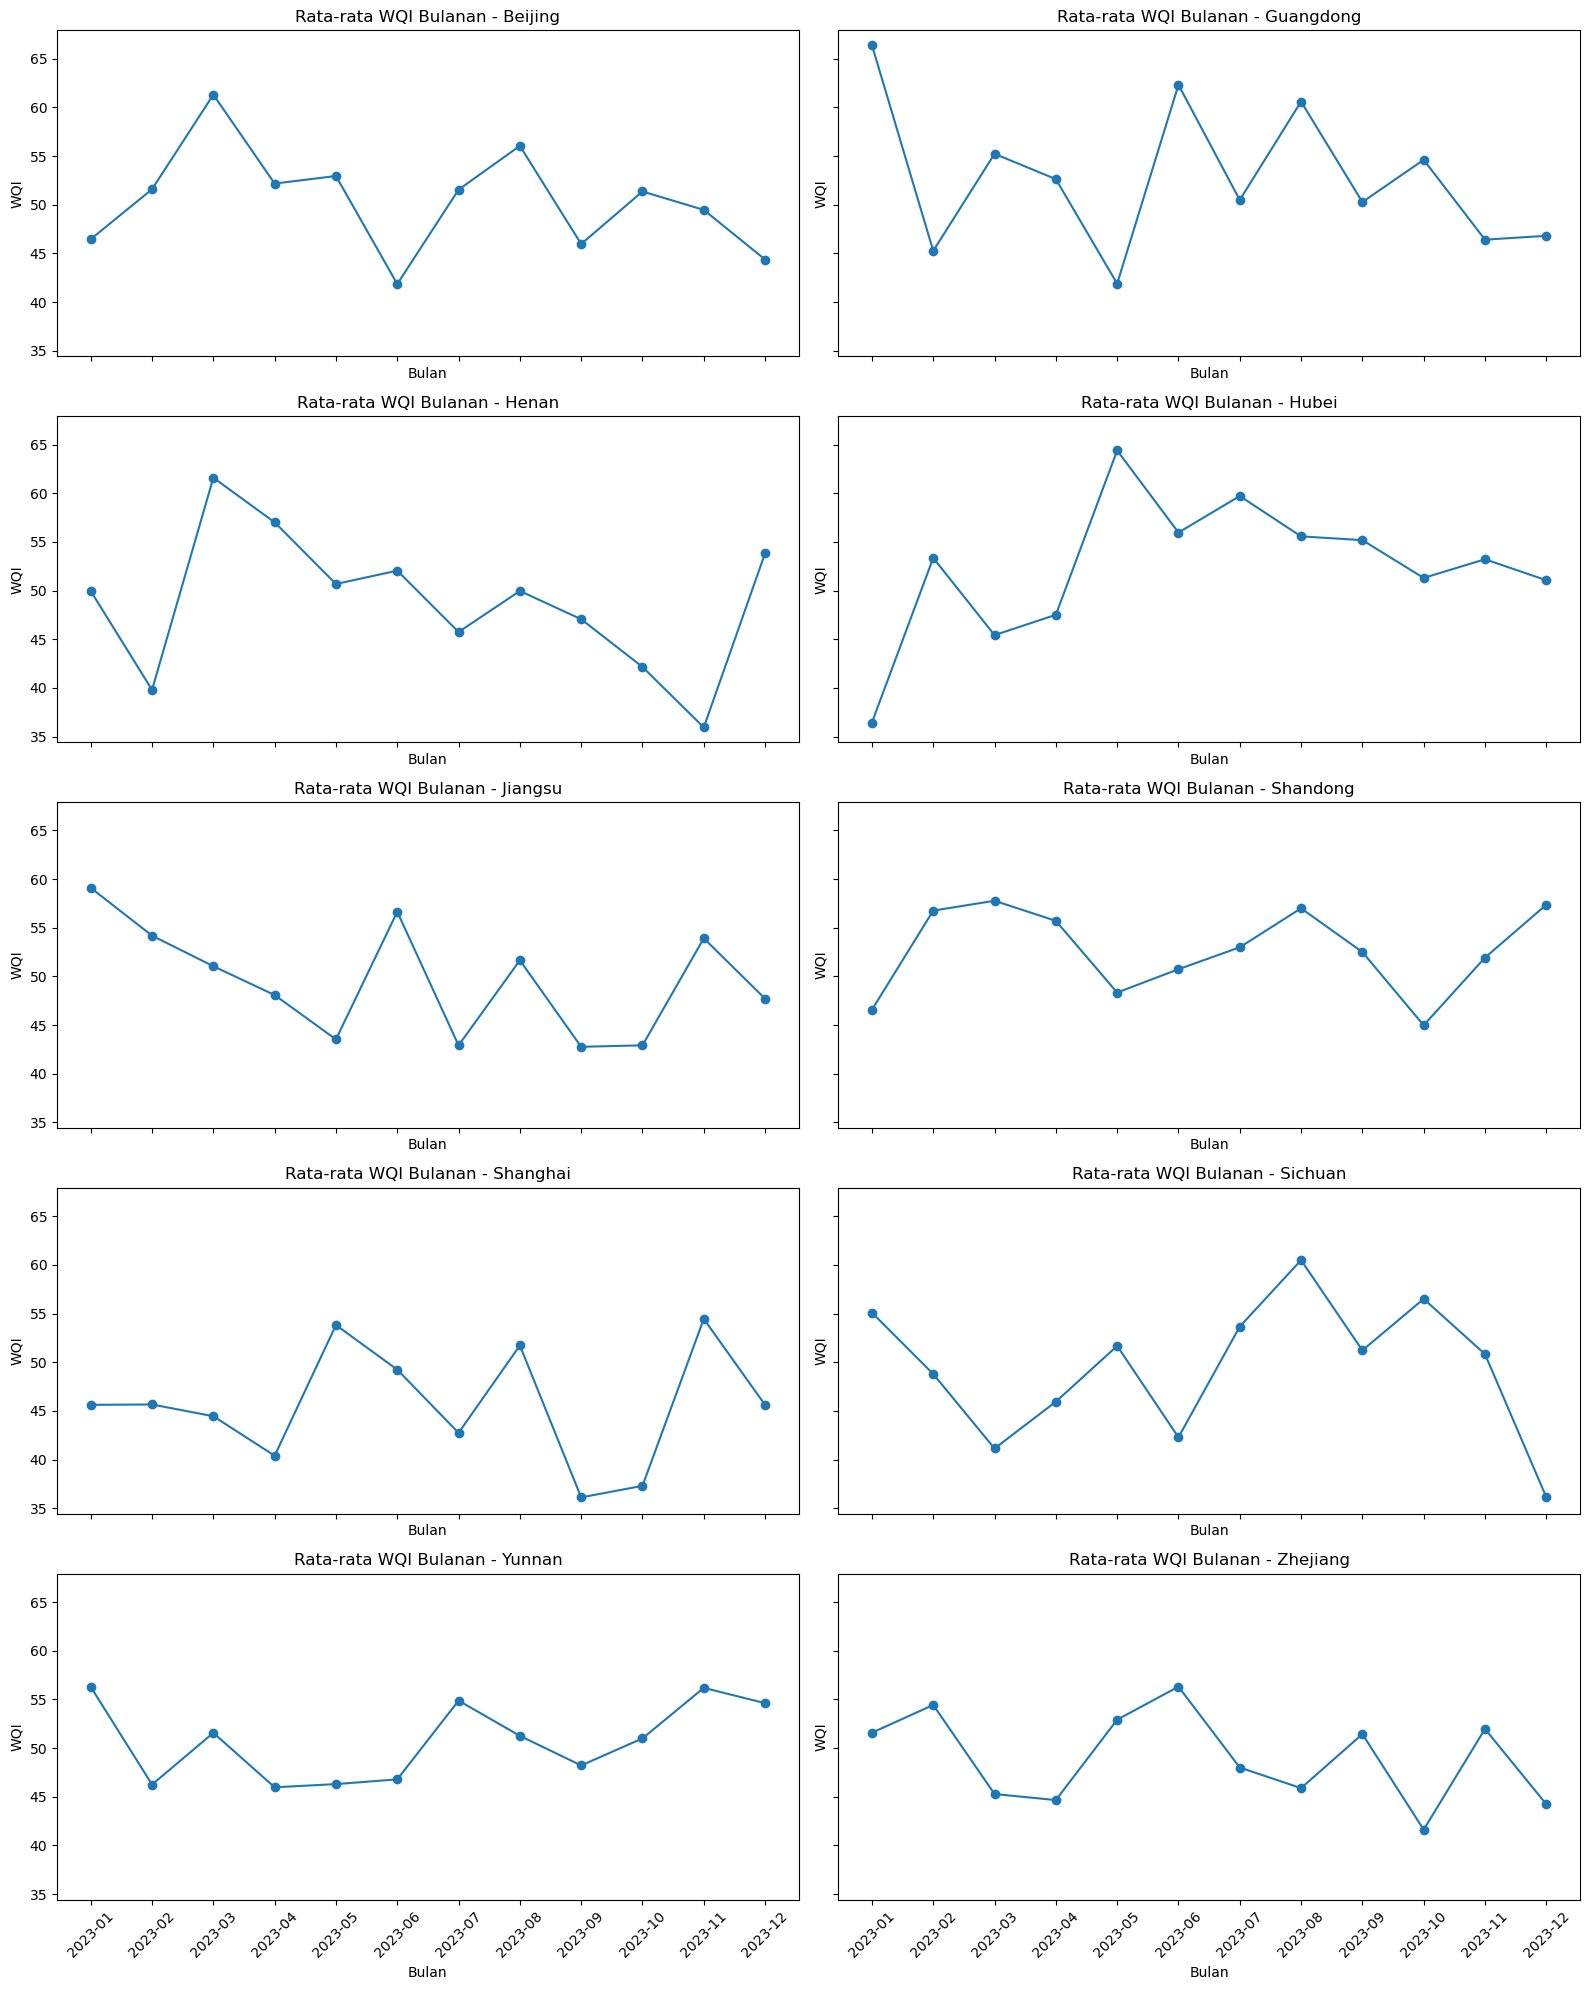

In [14]:
# Check Daily Date to WQI per Provinces
monthly_avg = df_timeseries.groupby(['Province', 'Month'])['Water_Quality_Index'].mean().reset_index()
unique_provinces = monthly_avg['Province'].unique()

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20), sharex=True, sharey=True)
axes = axes.flatten()
for i, province in enumerate(unique_provinces):
    prov_data = monthly_avg[monthly_avg['Province'] == province]
    axes[i].plot(prov_data['Month'], prov_data['Water_Quality_Index'], marker='o')
    axes[i].set_title(f'Rata-rata WQI Bulanan - {province}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('WQI')
    axes[i].set_xlabel('Bulan')

plt.tight_layout()
plt.show()

### Check Categorical Columns



In [15]:
# Check Pollution Level
print("Values in Pollution Level:", df['Pollution_Level'].unique())
print(df['Pollution_Level'].value_counts())

Values in Pollution Level: ['Very Poor' 'Excellent' 'Poor' 'Moderate' 'Good']
Pollution_Level
Good         622
Very Poor    609
Excellent    594
Moderate     588
Poor         587
Name: count, dtype: int64


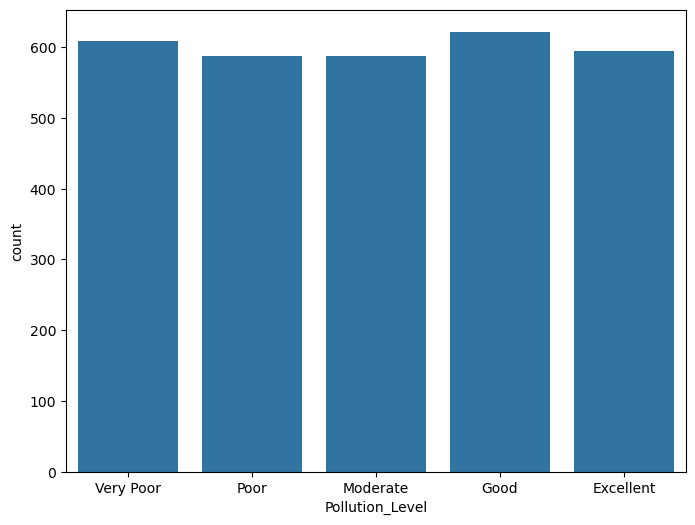

In [16]:
pollution_level_cols = ['Very Poor', 'Poor', 'Moderate', 'Good', 'Excellent']
plt.figure(figsize=(8, 6))
sns.countplot(x='Pollution_Level', data=df, order=pollution_level_cols)
plt.show()

In [17]:
# Check Remarks
print("Values in Remarks:", df['Remarks'].unique())
print(df['Remarks'].value_counts())

Values in Remarks: ['High pollution spike detected' 'Monitoring recommended' nan
 'Requires attention']
Remarks
High pollution spike detected    780
Monitoring recommended           745
Requires attention               723
Name: count, dtype: int64


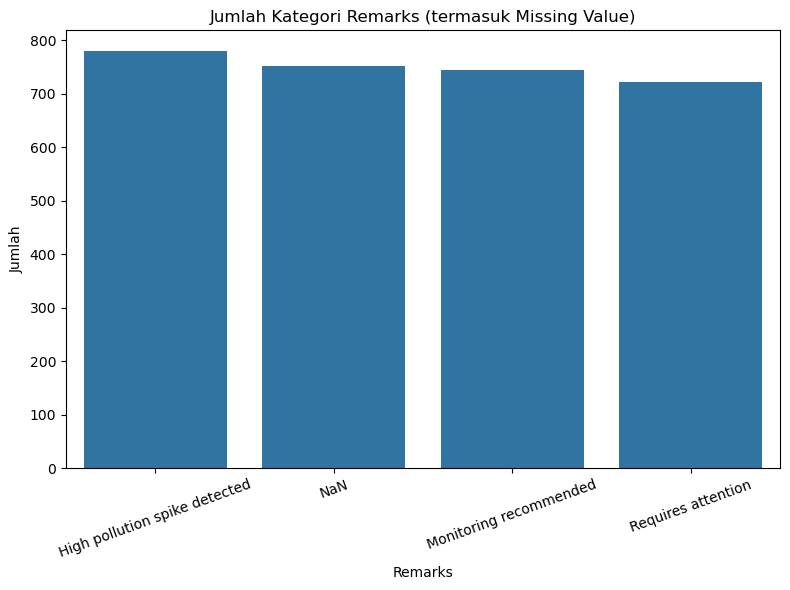

In [18]:
df['Remarks_filled'] = df['Remarks'].fillna('NaN')

plt.figure(figsize=(8, 6))
sns.countplot(x='Remarks_filled', data=df, order=df['Remarks_filled'].value_counts().index)
plt.title("Jumlah Kategori Remarks (termasuk Missing Value)")
plt.xlabel("Remarks")
plt.ylabel("Jumlah")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Multivariate Analysis

### Show Correlation

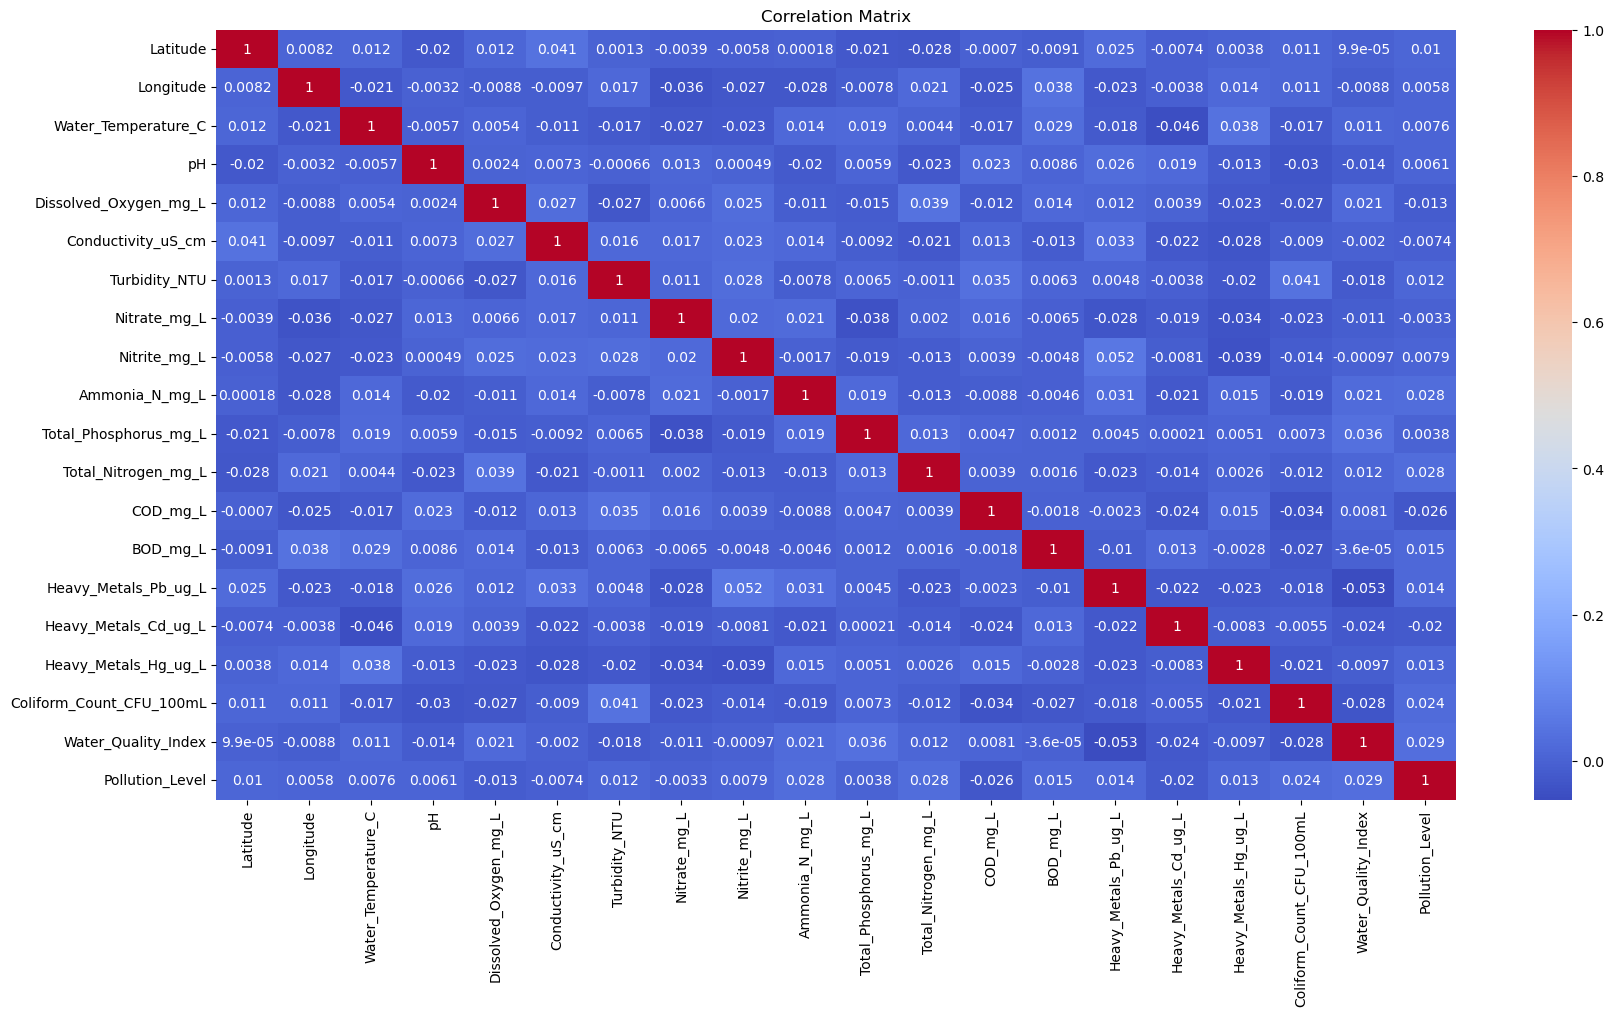

In [19]:
# Make duplicate of dataset
df_corr = df.copy()
df_corr.drop(['Province', 'City', 'Monitoring_Station', 'Date', 'Remarks', 'Remarks_filled'], axis=1, inplace=True)

# Encode 'Pollution Level' Column
df_corr['Pollution_Level'] = df_corr['Pollution_Level'].map({'Very Poor': 0 , 'Poor': 1, 'Moderate': 2, 'Good': 3, 'Excellent': 4})

# Show correlation
corr_matrix = df_corr.corr(method='spearman')
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Check Feature Distribution with WQI by Pollution Level

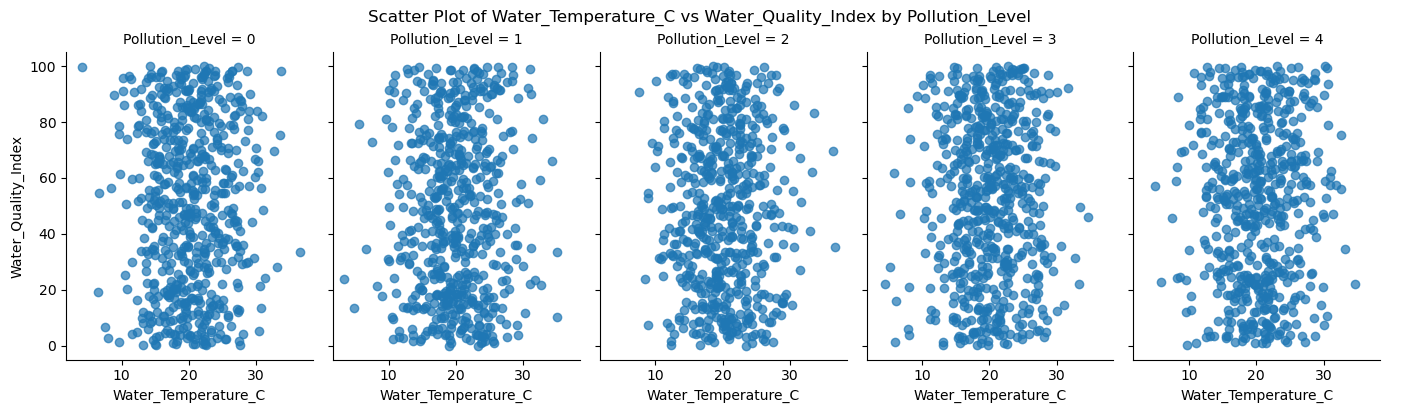

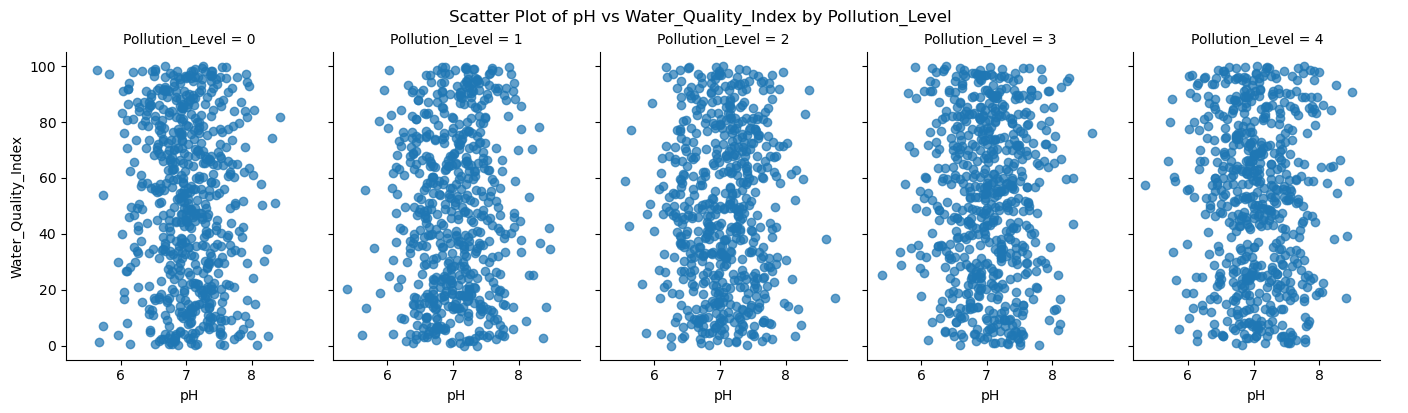

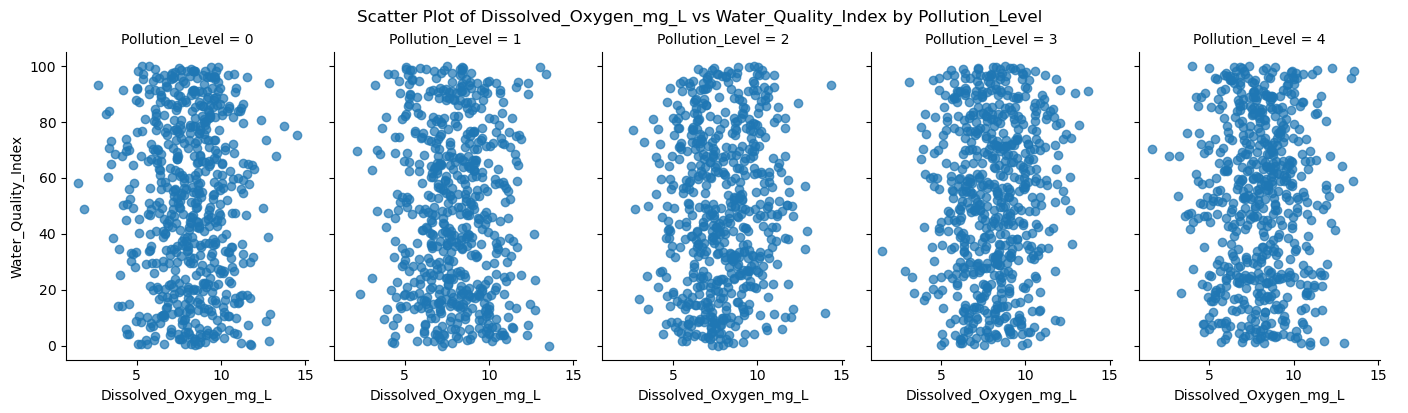

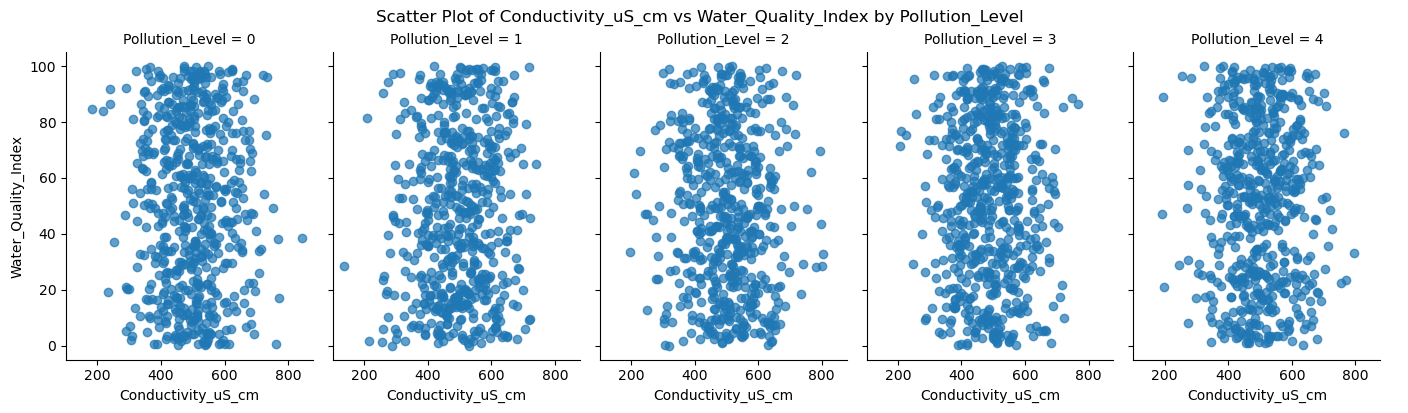

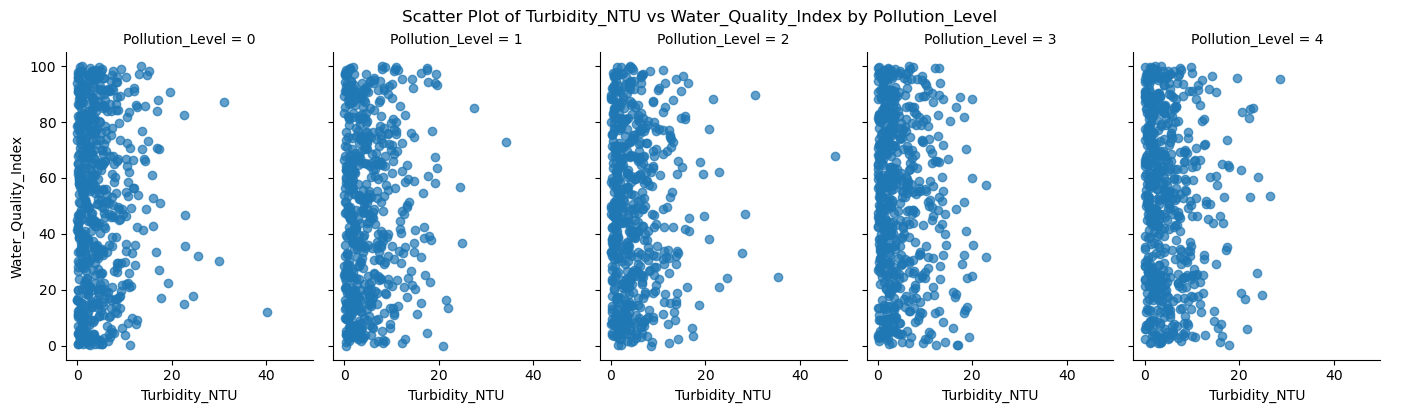

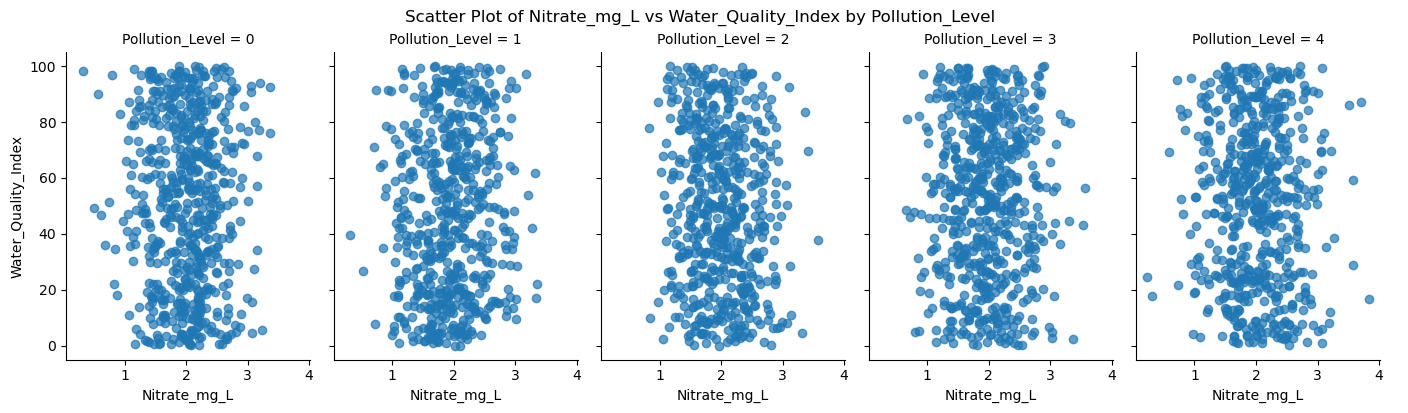

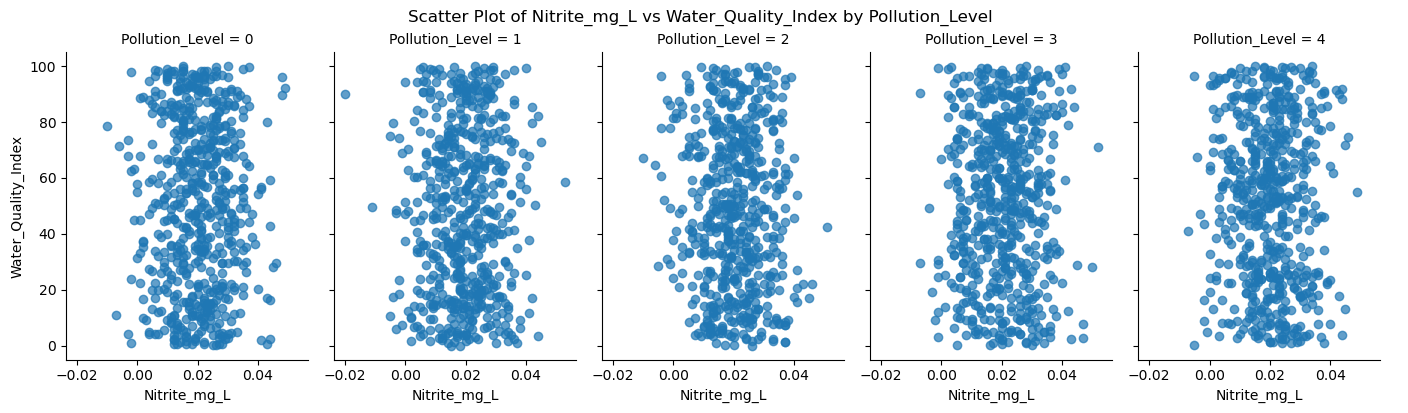

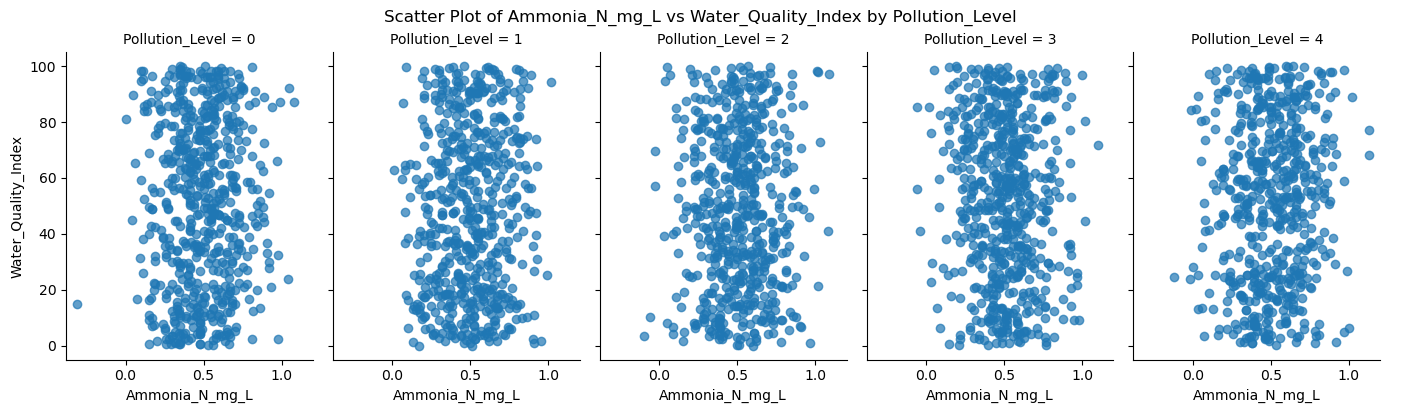

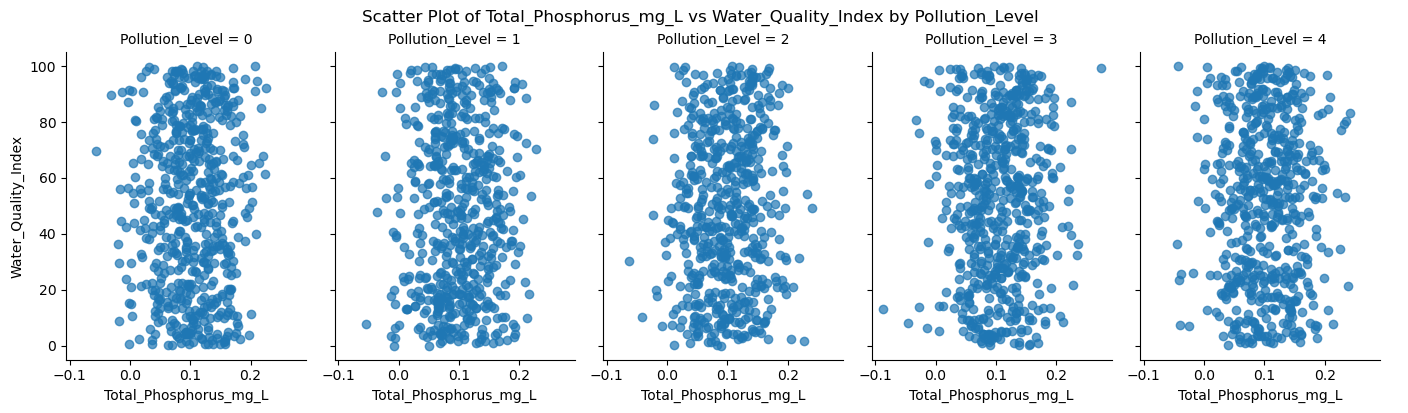

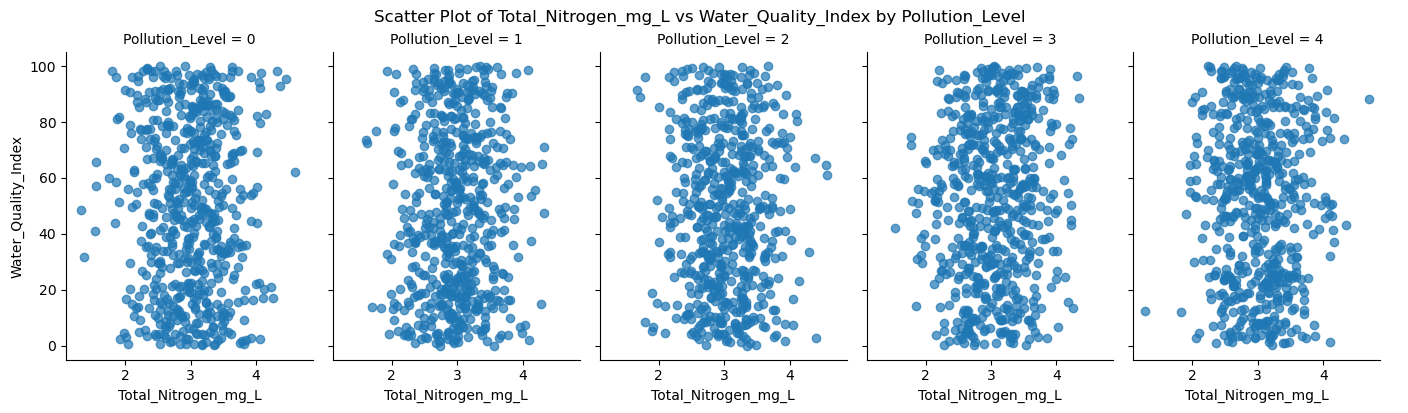

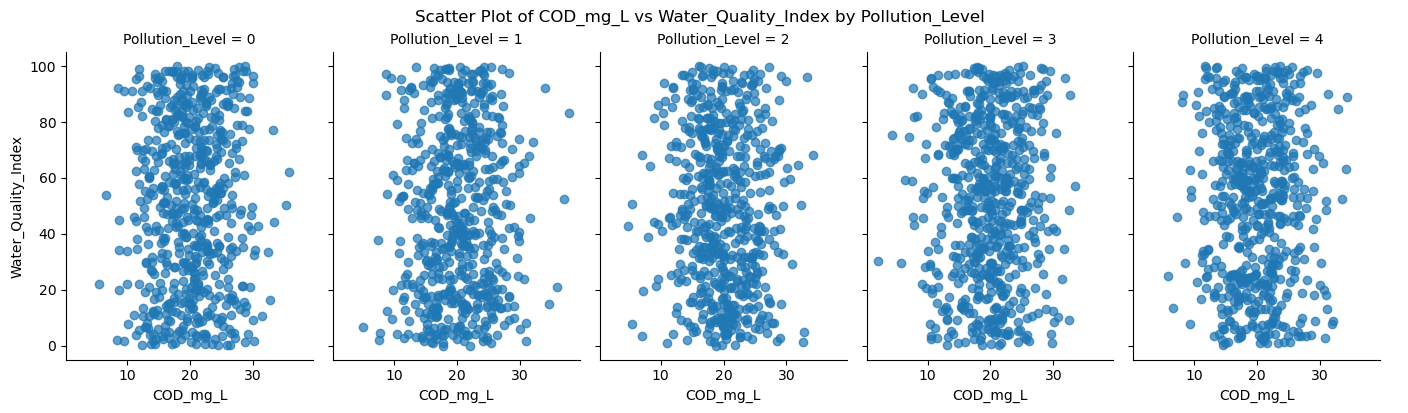

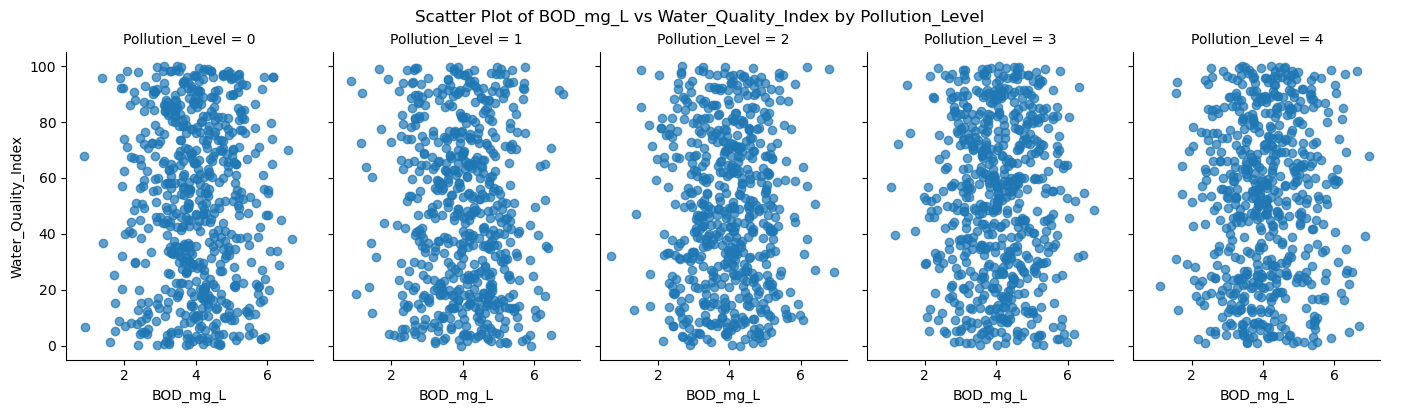

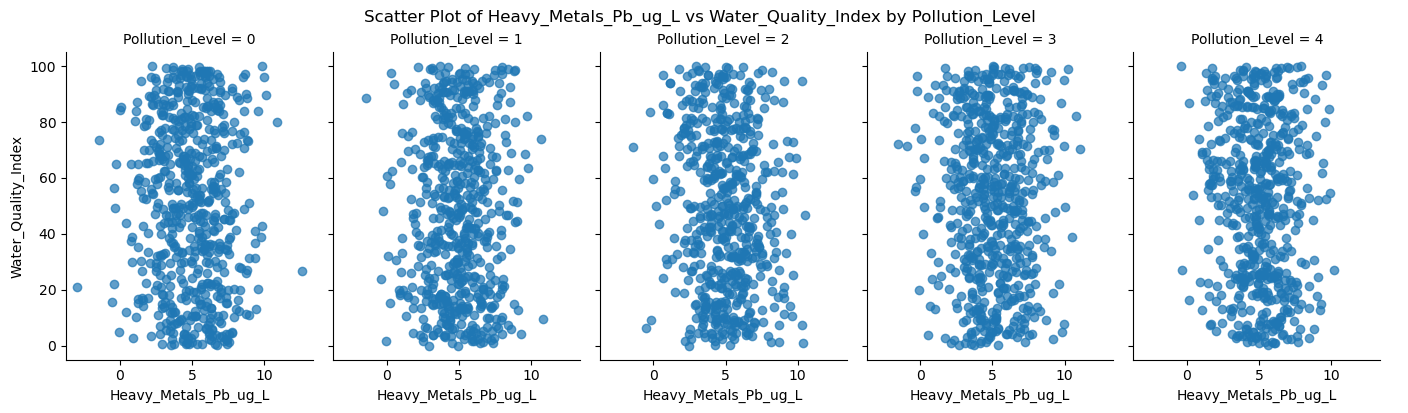

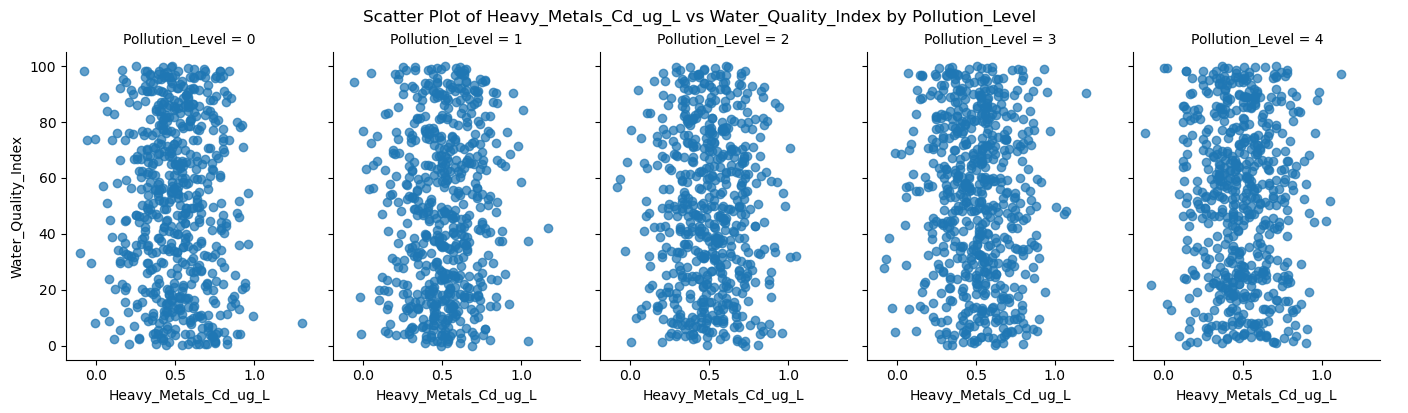

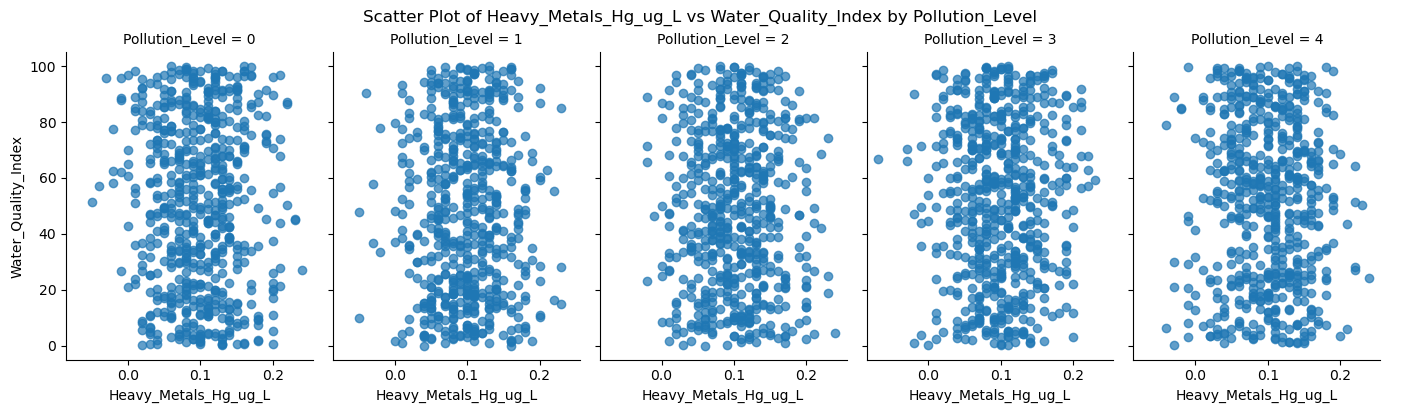

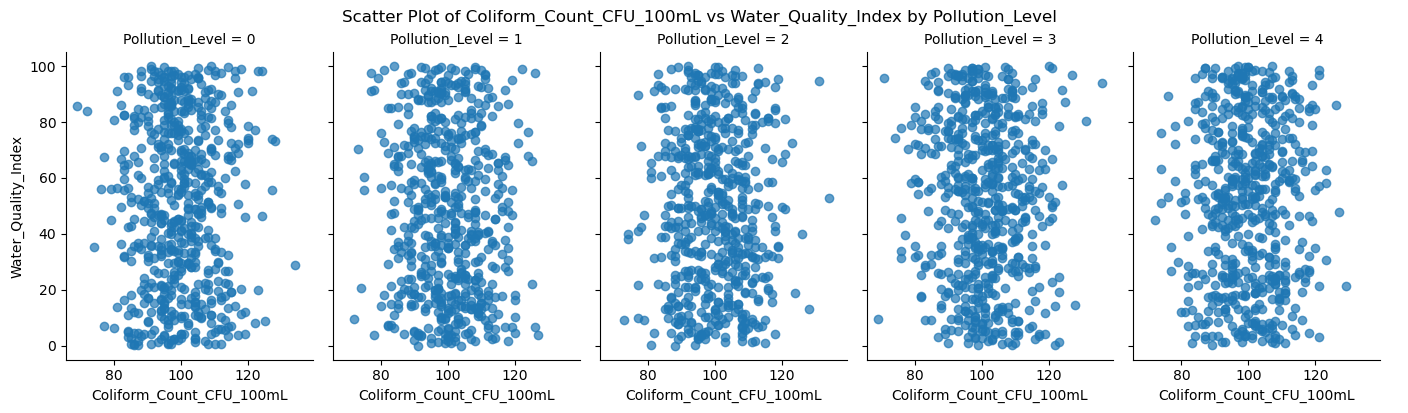

In [20]:
# Scatter plots of numerical variables grouped by Pollution_Level
num_cols = [
    'Water_Temperature_C', 'pH', 'Dissolved_Oxygen_mg_L', 'Conductivity_uS_cm',
    'Turbidity_NTU', 'Nitrate_mg_L', 'Nitrite_mg_L', 'Ammonia_N_mg_L',
    'Total_Phosphorus_mg_L', 'Total_Nitrogen_mg_L', 'COD_mg_L', 'BOD_mg_L',
    'Heavy_Metals_Pb_ug_L', 'Heavy_Metals_Cd_ug_L', 'Heavy_Metals_Hg_ug_L',
    'Coliform_Count_CFU_100mL'
]

df_scatter = df_corr.copy()

for col in num_cols:
    fg = sns.FacetGrid(df_scatter, col="Pollution_Level", height=4, aspect=.7)
    fg.map(plt.scatter, col, "Water_Quality_Index", alpha=.7) # Assuming Water_Quality_Index is the target variable
    fg.add_legend()
    plt.suptitle(f'Scatter Plot of {col} vs Water_Quality_Index by Pollution_Level', y=1.02)
    plt.show()

# Data Pre-processing

In [21]:
# Handling missing values on 'Remarks'

# We already filled missing values in 'Remarks' with 'NaN' in the previous step.
# But, because the 'Remarks' column is additional information and not a primary feature
# we can ignore it for further analysis.
df.drop(columns=['Remarks', 'Remarks_filled'], inplace=True)

In [22]:
# Encode 'Pollution_Level'
df['Pollution_Level'] = df['Pollution_Level'].map({
    'Very Poor': 0, 
    'Poor': 0, 
    'Moderate': 0, 
    'Good': 1, 
    'Excellent': 1
})

In [23]:
# Handling Outliers in numerical columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
	Q1 = df[col].quantile(0.25)
	Q3 = df[col].quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	df[col] = np.where(df[col] < lower_bound, lower_bound,
					   np.where(df[col] > upper_bound, upper_bound, df[col]))

# Check for negative values in specific columns and set them to 0
print("\nCheck negative values in dataset:")
negative_cols = [col for col in numeric_cols if (df[col] < 0).any()]
if negative_cols:
	print(f"Negative values found in columns: {negative_cols}")
else:
	print("No negative values found in numeric columns.")


Check negative values in dataset:
Negative values found in columns: ['Nitrite_mg_L', 'Ammonia_N_mg_L', 'Total_Phosphorus_mg_L', 'Heavy_Metals_Pb_ug_L', 'Heavy_Metals_Cd_ug_L', 'Heavy_Metals_Hg_ug_L']


In [24]:
anomaly_cols = [
	'Nitrite_mg_L', 'Ammonia_N_mg_L', 'Total_Phosphorus_mg_L', 
	'Heavy_Metals_Pb_ug_L', 'Heavy_Metals_Cd_ug_L', 'Heavy_Metals_Hg_ug_L'
]

for col in anomaly_cols:
	df.loc[df[col] < 0, col] = 0

In [25]:
# Split dataset for training and testing
from sklearn.model_selection import train_test_split

# Kolom yang di-drop untuk fitur dan target:
columns_to_drop = [
    'Province', 'City', 'Monitoring_Station', 'Latitude', 'Longitude', 'Date',  # Non-features
    'Water_Quality_Index',  # DROP - data leakage dengan target
    'Turbidity_NTU',  # DROP - karena outlier yang sangat tinggi
    'Pollution_Level'       # Target variable
]

X = df.drop(columns=columns_to_drop)
y = df['Pollution_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Feature Selection with Recursive Feature Elimination (RFE) & Random Forest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get feature ranking
feature_ranking = rfe.ranking_
feature_support = rfe.support_

# Create a DataFrame to show feature ranking
feature_ranking_df = pd.DataFrame({
    'Column': X_train.columns,
    'Feature': [f'Feature {i}' for i in range(X.shape[1])],
    'Selected': feature_support,
    'Ranking': feature_ranking,
}).sort_values(by='Ranking')

print(feature_ranking_df)

                      Column     Feature  Selected  Ranking
0        Water_Temperature_C   Feature 0      True        1
1                         pH   Feature 1      True        1
2      Dissolved_Oxygen_mg_L   Feature 2      True        1
3         Conductivity_uS_cm   Feature 3      True        1
4               Nitrate_mg_L   Feature 4      True        1
7      Total_Phosphorus_mg_L   Feature 7      True        1
9                   COD_mg_L   Feature 9      True        1
8        Total_Nitrogen_mg_L   Feature 8      True        1
10                  BOD_mg_L  Feature 10      True        1
11      Heavy_Metals_Pb_ug_L  Feature 11      True        1
12      Heavy_Metals_Cd_ug_L  Feature 12     False        2
6             Ammonia_N_mg_L   Feature 6     False        3
14  Coliform_Count_CFU_100mL  Feature 14     False        4
5               Nitrite_mg_L   Feature 5     False        5
13      Heavy_Metals_Hg_ug_L  Feature 13     False        6


In [27]:
# Select top 10 features based on Random Forest
selected_features = feature_ranking_df[feature_ranking_df['Selected'] == True]['Column'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [28]:
# Scaled features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [29]:
# Handling Imbalanced Data with SMOTE
from imblearn.over_sampling import SMOTE

# Get data before SMOTE
print("Before SMOTE:")
print("Training set class distribution:", y_train.value_counts())

# Apply SMOTE to balance the training set
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Print data after SMOTE
print("\nAfter SMOTE:")
print("Training set class distribution:", pd.Series(y_train_balanced).value_counts())


Before SMOTE:
Training set class distribution: Pollution_Level
0.0    1417
1.0     983
Name: count, dtype: int64

After SMOTE:
Training set class distribution: Pollution_Level
1.0    1417
0.0    1417
Name: count, dtype: int64


# Modelling

## Classification with Random Forest


--- Random Forest Classifier ---

--- Evaluasi Model Random Forest ---
Cross-validation scores: 0.6245636011242607
              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62       367
         1.0       0.36      0.31      0.33       233

    accuracy                           0.52       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.51      0.52      0.51       600

Training time: 3.49 seconds


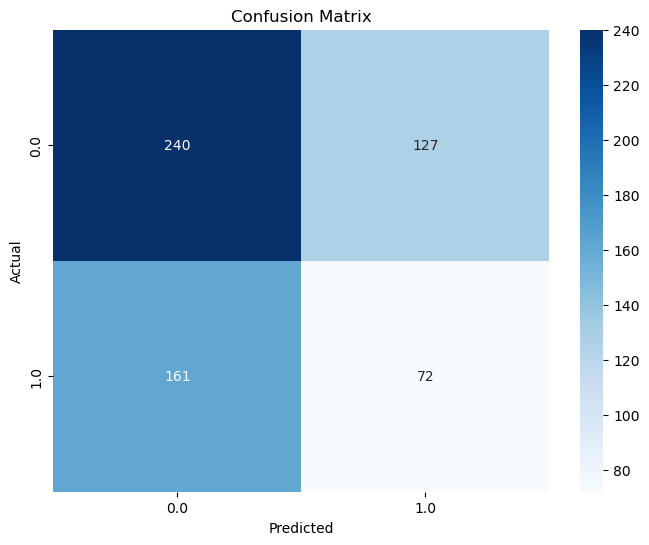

In [30]:
# Classification with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
import time

print("\n--- Random Forest Classifier ---")
start_time = time.time()

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, criterion='gini', random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_classifier, X_train_balanced, y_train_balanced, cv=skf, return_train_score=True)
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Evaluate the model
y_pred = rf_classifier.predict(X_test_scaled)
print("\n--- Evaluasi Model Random Forest ---")
print("Cross-validation scores:", cv_results['test_score'].mean())
print(classification_report(y_test, y_pred))

# Calculate training time
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



--- Optimasi Random Forest dengan GridSearchCV ---
Fitting 5 folds for each of 150 candidates, totalling 750 fits

Parameter Terbaik untuk Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
Skor Akurasi Cross-Validation Terbaik: 0.6274

--- Evaluasi Model Random Forest (Optimized) ---
              precision    recall  f1-score   support

         0.0       0.60      0.67      0.63       367
         1.0       0.36      0.29      0.32       233

    accuracy                           0.52       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.50      0.52      0.51       600

Training time: 87.70 seconds


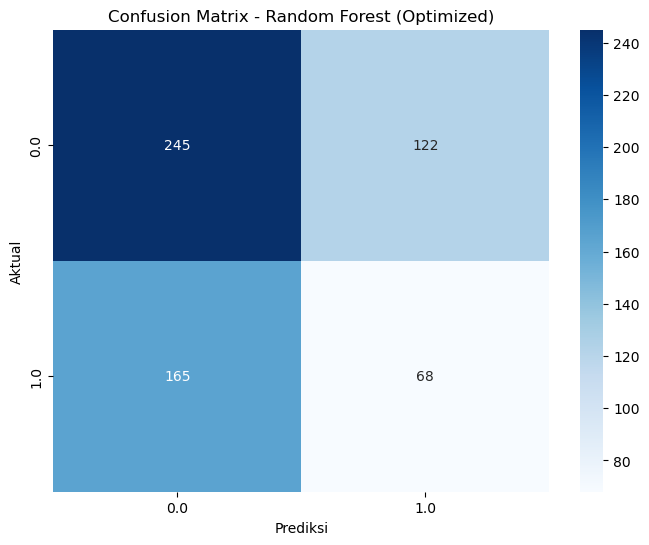

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

print("--- Optimasi Random Forest dengan GridSearchCV ---")
start_time = time.time()

# Hyperparameter untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],           # Jumlah pohon
    'max_depth': [None, 5, 10, 15, 20],        # Kedalaman maksimum pohon
    'min_samples_leaf': [1, 2, 4, 8, 10],      # Sampel minimum untuk node daun
    'criterion': ['gini', 'entropy']           # Fungsi pemisahan
}

# Inisialisasi Random Forest Classifier
rf_base = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_base, param_grid=param_grid_rf,
                              cv=skf, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Dapatkan parameter terbaik dan model terbaik
best_params_rf = grid_search_rf.best_params_
best_rf_classifier = grid_search_rf.best_estimator_


print(f"\nParameter Terbaik untuk Random Forest: {best_params_rf}")
print(f"Skor Akurasi Cross-Validation Terbaik: {grid_search_rf.best_score_:.4f}")

# Evaluasi model Random Forest terbaik pada data uji
y_pred_rf_optimized = best_rf_classifier.predict(X_test_scaled)

print("\n--- Evaluasi Model Random Forest (Optimized) ---")
print(classification_report(y_test, y_pred_rf_optimized))

# Calculate training time
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Confusion Matrix (Optimized Random Forest)
cm_rf_optimized = confusion_matrix(y_test, y_pred_rf_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_rf_classifier.classes_, yticklabels=best_rf_classifier.classes_)
plt.title('Confusion Matrix - Random Forest (Optimized)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [32]:
# Optimasi Random Forest dengan Optuna
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

print("--- Optimasi Random Forest dengan Optuna ---")
start_time = time.time()

def objective_rf(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_categorical('max_depth', [None, 5, 10, 15, 20])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    
    # Create model with suggested parameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=42,
        n_jobs=-1
    )
    
    # Cross validation score
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=skf, scoring='accuracy')
    return scores.mean()

# Run Optuna optimization
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

print(f"Best parameters: {study_rf.best_params}")
print(f"Best CV score: {study_rf.best_value:.4f}")

[I 2025-08-07 18:18:44,059] A new study created in memory with name: no-name-e58f049b-f5ae-4cfa-908c-816dc9af3f54


--- Optimasi Random Forest dengan Optuna ---


[I 2025-08-07 18:18:45,383] Trial 0 finished with value: 0.545177956014234 and parameters: {'n_estimators': 204, 'max_depth': 5, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 0 with value: 0.545177956014234.
[I 2025-08-07 18:18:47,663] Trial 1 finished with value: 0.5882189441671185 and parameters: {'n_estimators': 281, 'max_depth': 20, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 1 with value: 0.5882189441671185.
[I 2025-08-07 18:18:49,261] Trial 2 finished with value: 0.561758308872561 and parameters: {'n_estimators': 242, 'max_depth': 10, 'min_samples_leaf': 10, 'criterion': 'gini'}. Best is trial 1 with value: 0.5882189441671185.
[I 2025-08-07 18:18:50,235] Trial 3 finished with value: 0.5769283501910121 and parameters: {'n_estimators': 135, 'max_depth': 10, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 1 with value: 0.5882189441671185.
[I 2025-08-07 18:18:52,303] Trial 4 finished with value: 0.5963392973993681 and parameters: {'n_estimato

Best parameters: {'n_estimators': 64, 'max_depth': None, 'min_samples_leaf': 1, 'criterion': 'entropy'}
Best CV score: 0.6284



--- Evaluasi Model Random Forest (Optuna Optimized) ---
              precision    recall  f1-score   support

         0.0       0.59      0.63      0.61       367
         1.0       0.34      0.30      0.32       233

    accuracy                           0.50       600
   macro avg       0.47      0.47      0.47       600
weighted avg       0.49      0.50      0.50       600

Training time: 59.35 seconds


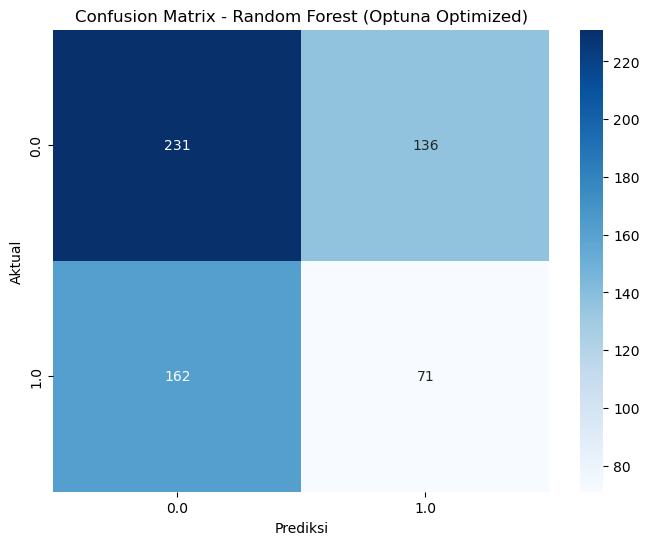

In [33]:
# Train and evaluate the best model found by Optuna
from sklearn.metrics import classification_report, confusion_matrix

# Train model with best parameters
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
best_rf.fit(X_train_balanced, y_train_balanced)

# Evaluate
y_pred_rf_optuna = best_rf.predict(X_test_scaled)

print("\n--- Evaluasi Model Random Forest (Optuna Optimized) ---")
print(classification_report(y_test, y_pred_rf_optuna))

# Calculate training time
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Confusion Matrix
cm_rf_optuna = confusion_matrix(y_test, y_pred_rf_optuna)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_optuna, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title('Confusion Matrix - Random Forest (Optuna Optimized)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## Classification with Random Forest + XGBoost

--- Stacking Classifier (Random Forest + XGBoost) ---

--- Evaluasi Stacking Classifier (Random Forest + XGBoost) ---
Cross-validation scores: 0.5843345111896348

--- Evaluasi Model Stacking Classifier (Random Forest + XGBoost) ---
              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59       367
         1.0       0.36      0.36      0.36       233

    accuracy                           0.50       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.50      0.50      0.50       600

Training time: 8.29 seconds


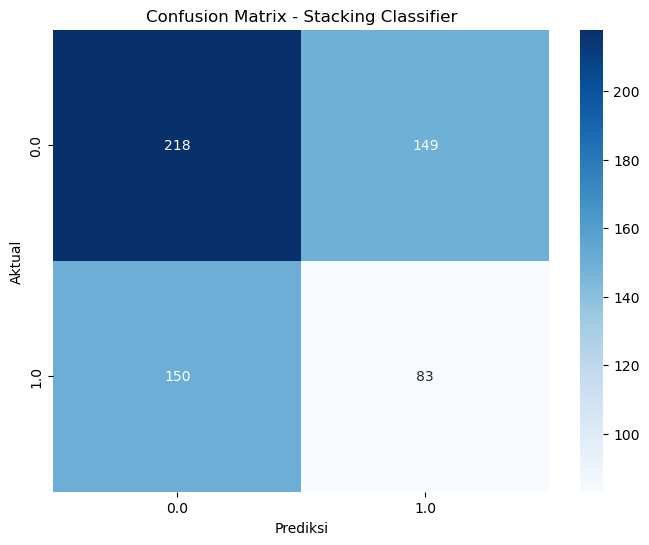

In [34]:
# Classification with Random Forest + XGBoost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import time

print("--- Stacking Classifier (Random Forest + XGBoost) ---")
start_time = time.time()

# Define base models
base_models = [
    ('rf', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_leaf=1,
        criterion='gini',
        random_state=42,
        n_jobs=-1
    )),
    ('xgb', XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.5,
        random_state=42,
        eval_metric='mlogloss',
        n_jobs=-1
    ))
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=skf
)

# Evaluate cross validation score
cv_results_stacking = cross_validate(stacking_clf, X_train_balanced, y_train_balanced, cv=skf, return_train_score=True)
print("\n--- Evaluasi Stacking Classifier (Random Forest + XGBoost) ---")
print("Cross-validation scores:", cv_results_stacking['test_score'].mean())

# Fit stacking model
stacking_clf.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred_stacking = stacking_clf.predict(X_test_scaled)
print("\n--- Evaluasi Model Stacking Classifier (Random Forest + XGBoost) ---")
print(classification_report(y_test, y_pred_stacking))

# Calculate training time
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Confusion Matrix for Stacking Classifier
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues',
            xticklabels=stacking_clf.classes_, yticklabels=stacking_clf.classes_)
plt.title('Confusion Matrix - Stacking Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

--- Optimasi Stacking Classifier (Random Forest + XGBoost) dengan GridSearchCV ---
Fitting 5 folds for each of 512 candidates, totalling 2560 fits

Parameter Terbaik untuk Stacking Classifier: {'final_estimator__C': 1.0, 'rf__criterion': 'gini', 'rf__max_depth': 15, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 200, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 0.5}
Skor Akurasi Cross-Validation Terbaik: 0.6242

--- Evaluasi Model Stacking Classifier (Optimized) ---
              precision    recall  f1-score   support

         0.0       0.60      0.65      0.63       367
         1.0       0.37      0.32      0.34       233

    accuracy                           0.53       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.51      0.53      0.52       600

Training time: 1402.68 seconds


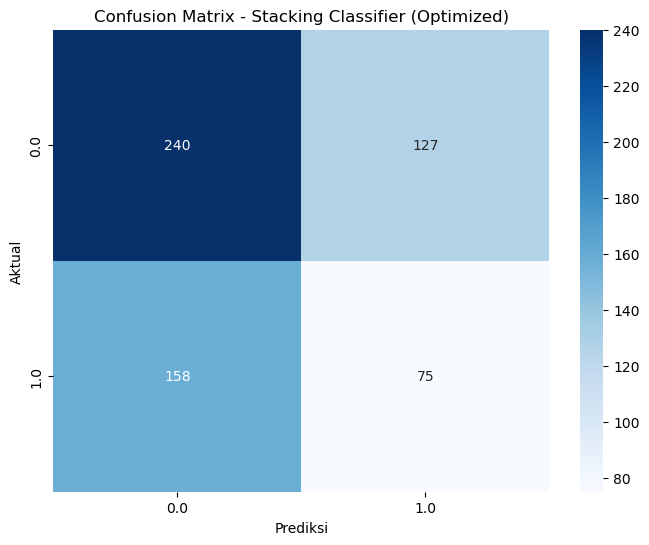

In [35]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

print("--- Optimasi Stacking Classifier (Random Forest + XGBoost) dengan GridSearchCV ---")
start_time = time.time()

# Hyperparameter untuk Stacking Classifier
param_grid_stacking = {
    'rf__n_estimators': [100, 200],                    # Jumlah pohon RF
    'rf__max_depth': [10, 15],                         # Kedalaman maksimum RF
    'rf__min_samples_leaf': [1, 2],                    # Sampel minimum untuk node daun RF
    'rf__criterion': ['gini', 'entropy'],              # Fungsi pemisahan RF
    'xgb__n_estimators': [100, 200],                   # Jumlah pohon XGBoost
    'xgb__max_depth': [3, 6],                          # Kedalaman maksimum XGBoost
    'xgb__learning_rate': [0.1, 0.2],                  # Learning rate XGBoost
    'xgb__subsample': [0.5, 1.0],                      # Subsample XGBoost
    'final_estimator__C': [1.0, 10.0]                  # Regularization parameter LogReg
}

# Base models untuk Stacking
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss'))
]

# Inisialisasi Stacking Classifier
stacking_base = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(random_state=42, max_iter=100),
    cv=None  # Use StratifiedKFold in GridSearchCV
)

# Inisialisasi GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_stacking = GridSearchCV(
    estimator=stacking_base, 
    param_grid=param_grid_stacking,
    cv=skf,
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)
grid_search_stacking.fit(X_train_balanced, y_train_balanced)

# Dapatkan parameter terbaik dan model terbaik
best_params_stacking = grid_search_stacking.best_params_
best_stacking_classifier = grid_search_stacking.best_estimator_

print(f"\nParameter Terbaik untuk Stacking Classifier: {best_params_stacking}")
print(f"Skor Akurasi Cross-Validation Terbaik: {grid_search_stacking.best_score_:.4f}")

# Evaluasi model Stacking Classifier terbaik pada data uji
y_pred_stacking_optimized = best_stacking_classifier.predict(X_test_scaled)

print("\n--- Evaluasi Model Stacking Classifier (Optimized) ---")
print(classification_report(y_test, y_pred_stacking_optimized))

# Calculate training time
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Confusion Matrix (Optimized Stacking Classifier)
cm_stacking_optimized = confusion_matrix(y_test, y_pred_stacking_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_stacking_classifier.classes_, yticklabels=best_stacking_classifier.classes_)
plt.title('Confusion Matrix - Stacking Classifier (Optimized)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [36]:
# Optimasi Random Forest + XGBoost dengan Optuna
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

print("--- Optimasi Random Forest + XGBoost dengan Optuna ---")
start_time = time.time()

def objective_stacking(trial):
    # Suggest hyperparameters for Random Forest
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 50, 300)
    rf_max_depth = trial.suggest_categorical('rf_max_depth', [None, 5, 10, 15, 20])
    rf_min_samples_leaf = trial.suggest_int('rf_min_samples_leaf', 1, 10)
    rf_criterion = trial.suggest_categorical('rf_criterion', ['gini', 'entropy'])

    # Suggest hyperparameters for XGBoost
    xgb_n_estimators = trial.suggest_int('xgb_n_estimators', 50, 300)
    xgb_max_depth = trial.suggest_int('xgb_max_depth', 3, 10)
    xgb_learning_rate = trial.suggest_float('xgb_learning_rate', 0.01, 0.3)
    xgb_subsample = trial.suggest_float('xgb_subsample', 0.5, 1.0)

    # Create base models
    rf_model = RandomForestClassifier(
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        min_samples_leaf=rf_min_samples_leaf,
        criterion=rf_criterion,
        random_state=42,
        n_jobs=-1
    )
    xgb_model = XGBClassifier(
        n_estimators=xgb_n_estimators,
        max_depth=xgb_max_depth,
        learning_rate=xgb_learning_rate,
        subsample=xgb_subsample,
        random_state=42,
        eval_metric='mlogloss'
    )
    final_estimator = LogisticRegression(C=trial.suggest_float('final_C', 0.1, 10.0), random_state=42, max_iter=100)

    # Create Stacking Classifier
    stacking_model = StackingClassifier(
        estimators=[('rf', rf_model), ('xgb', xgb_model)],
        final_estimator=final_estimator
    )

    # Cross validation score
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(stacking_model, X_train_balanced, y_train_balanced, cv=skf, scoring='accuracy')
    return scores.mean()

# Run Optuna optimization
study_stacking = optuna.create_study(direction='maximize')
study_stacking.optimize(objective_stacking, n_trials=50)
print(f"Best parameters: {study_stacking.best_params}")
print(f"Best CV score: {study_stacking.best_value:.4f}")

[I 2025-08-07 18:43:14,707] A new study created in memory with name: no-name-bd59164a-4e24-4cdd-88a6-ae610d5330d6


--- Optimasi Random Forest + XGBoost dengan Optuna ---


[I 2025-08-07 18:43:24,016] Trial 0 finished with value: 0.6055091268283259 and parameters: {'rf_n_estimators': 125, 'rf_max_depth': 20, 'rf_min_samples_leaf': 9, 'rf_criterion': 'gini', 'xgb_n_estimators': 96, 'xgb_max_depth': 10, 'xgb_learning_rate': 0.08389396022294911, 'xgb_subsample': 0.9253331377803682, 'final_C': 3.9841028350078687}. Best is trial 0 with value: 0.6055091268283259.
[I 2025-08-07 18:43:32,549] Trial 1 finished with value: 0.6168040832351787 and parameters: {'rf_n_estimators': 154, 'rf_max_depth': 15, 'rf_min_samples_leaf': 2, 'rf_criterion': 'entropy', 'xgb_n_estimators': 93, 'xgb_max_depth': 5, 'xgb_learning_rate': 0.06067192090027705, 'xgb_subsample': 0.6802962128002052, 'final_C': 7.035397728616207}. Best is trial 1 with value: 0.6168040832351787.
[I 2025-08-07 18:43:45,164] Trial 2 finished with value: 0.5836253045911468 and parameters: {'rf_n_estimators': 244, 'rf_max_depth': 5, 'rf_min_samples_leaf': 3, 'rf_criterion': 'gini', 'xgb_n_estimators': 93, 'xgb_ma

Best parameters: {'rf_n_estimators': 152, 'rf_max_depth': None, 'rf_min_samples_leaf': 1, 'rf_criterion': 'entropy', 'xgb_n_estimators': 60, 'xgb_max_depth': 4, 'xgb_learning_rate': 0.010526225415107705, 'xgb_subsample': 0.5858247749920005, 'final_C': 9.591225077894926}
Best CV score: 0.6493



--- Evaluasi Model Stacking Classifier Optuna (Optimized) ---
              precision    recall  f1-score   support

         0.0       0.60      0.69      0.64       367
         1.0       0.35      0.27      0.31       233

    accuracy                           0.53       600
   macro avg       0.48      0.48      0.47       600
weighted avg       0.50      0.53      0.51       600

Training time: 545.44 seconds


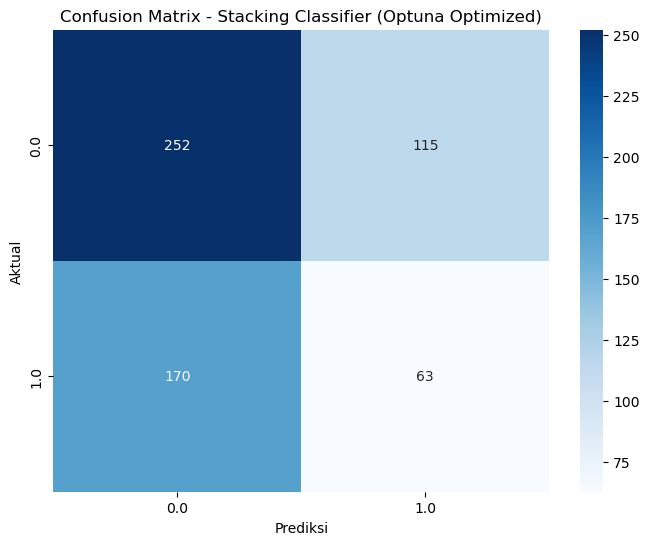

In [37]:
# Train and evaluate the best model found by Optuna
from sklearn.metrics import classification_report, confusion_matrix

# Extract best parameters for each estimator
rf_params = {
    'n_estimators': study_stacking.best_params['rf_n_estimators'],
    'max_depth': study_stacking.best_params['rf_max_depth'],
    'min_samples_leaf': study_stacking.best_params['rf_min_samples_leaf'],
    'criterion': study_stacking.best_params['rf_criterion'],
    'random_state': 42,
    'n_jobs': -1
}
xgb_params = {
    'n_estimators': study_stacking.best_params['xgb_n_estimators'],
    'max_depth': study_stacking.best_params['xgb_max_depth'],
    'learning_rate': study_stacking.best_params['xgb_learning_rate'],
    'subsample': study_stacking.best_params['xgb_subsample'],
    'random_state': 42,
    'eval_metric': 'mlogloss'
}
final_estimator_C = study_stacking.best_params['final_C']

# Train model with best parameters
best_stacking = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(**rf_params)),
        ('xgb', XGBClassifier(**xgb_params))
    ],
    final_estimator=LogisticRegression(C=final_estimator_C, random_state=42, max_iter=100),
    cv=skf
)
best_stacking.fit(X_train_balanced, y_train_balanced)

# Evaluate
y_pred_stacking_optuna = best_stacking.predict(X_test_scaled)
print("\n--- Evaluasi Model Stacking Classifier Optuna (Optimized) ---")
print(classification_report(y_test, y_pred_stacking_optuna))

# Calculate training time
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Confusion Matrix (Optimized Stacking Classifier)
cm_stacking_optuna = confusion_matrix(y_test, y_pred_stacking_optuna)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking_optuna, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_stacking.classes_, yticklabels=best_stacking.classes_)
plt.title('Confusion Matrix - Stacking Classifier (Optuna Optimized)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## Classification with K-Nearest Neighbor

--- K-Nearest Neighbors (KNN) ---

--- Evaluasi Model KNN ---
Cross-validation scores: 0.5680956743383128
              precision    recall  f1-score   support

         0.0       0.61      0.50      0.55       367
         1.0       0.39      0.51      0.44       233

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.49       600
weighted avg       0.53      0.50      0.51       600

Training time: 0.70 seconds


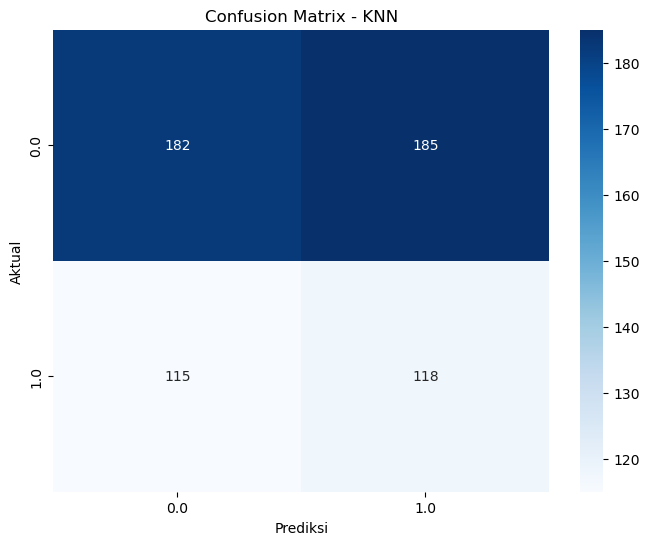

In [38]:
# Classification with K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
import time

print("--- K-Nearest Neighbors (KNN) ---")
start_time = time.time()

# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_knn = cross_validate(knn_classifier, X_train_balanced, y_train_balanced, cv=skf, return_train_score=True)
knn_classifier.fit(X_train_balanced, y_train_balanced)

# Evaluate the model
y_pred_knn = knn_classifier.predict(X_test_scaled)
print("\n--- Evaluasi Model KNN ---")
print("Cross-validation scores:", cv_results_knn['test_score'].mean())
print(classification_report(y_test, y_pred_knn))

# Calculate training time
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


--- Optimasi K-Nearest Neighbor dengan GridSearchCV ---
Fitting 5 folds for each of 28 candidates, totalling 140 fits

Parameter Terbaik untuk K-Nearest Neighbor: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Skor Akurasi Cross-Validation Terbaik: 0.6235

--- Evaluasi Model K-Nearest Neighbor (Optimized) ---
              precision    recall  f1-score   support

         0.0       0.64      0.57      0.61       367
         1.0       0.43      0.50      0.46       233

    accuracy                           0.55       600
   macro avg       0.53      0.54      0.53       600
weighted avg       0.56      0.55      0.55       600

Training time: 3.02 seconds


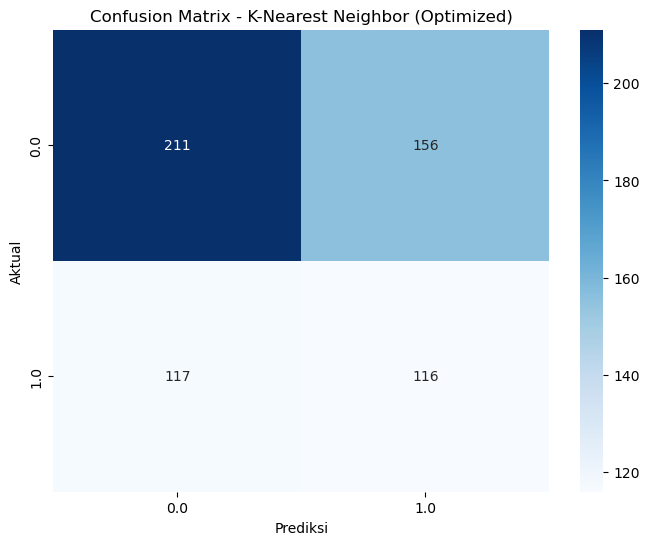

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

print("\n--- Optimasi K-Nearest Neighbor dengan GridSearchCV ---")
start_time = time.time()

# Definisikan parameter grid yang akan dicoba
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15], # Jumlah tetangga terdekat
    'weights': ['uniform', 'distance'],     # Bobot yang digunakan dalam prediksi
    'metric': ['euclidean', 'manhattan']    # Metrik jarak
}

# Inisialisasi K-Nearest Neighbor Classifier
knn_base = KNeighborsClassifier()

# Inisialisasi GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_knn = GridSearchCV(estimator=knn_base, param_grid=param_grid_knn,
                               cv=skf, scoring='accuracy', n_jobs=-1, verbose=1)

# Latih GridSearchCV pada data pelatihan yang sudah di-scale
grid_search_knn.fit(X_train_balanced, y_train_balanced)

# Dapatkan parameter terbaik dan model terbaik
best_params_knn = grid_search_knn.best_params_
best_knn_classifier = grid_search_knn.best_estimator_

print(f"\nParameter Terbaik untuk K-Nearest Neighbor: {best_params_knn}")
print(f"Skor Akurasi Cross-Validation Terbaik: {grid_search_knn.best_score_:.4f}")

# Evaluasi model K-Nearest Neighbor terbaik pada data uji
y_pred_knn_optimized = best_knn_classifier.predict(X_test_scaled)

print("\n--- Evaluasi Model K-Nearest Neighbor (Optimized) ---")
print(classification_report(y_test, y_pred_knn_optimized))

# Calculate training time
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Confusion Matrix (Optimized K-Nearest Neighbor)
cm_knn_optimized = confusion_matrix(y_test, y_pred_knn_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_knn_classifier.classes_, yticklabels=best_knn_classifier.classes_)
plt.title('Confusion Matrix - K-Nearest Neighbor (Optimized)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


In [40]:
# Optimasi K-Nearest Neighbor dengan Optuna
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

print("--- Optimasi K-Nearest Neighbor dengan Optuna ---")
start_time = time.time()

def objective_knn(trial):
    # Suggest hyperparameters
    n_neighbors = trial.suggest_int('n_neighbors', 3, 15, step=2)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan'])
    # Create model with suggested parameters
    knn = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        metric=metric
    )

    # Cross validation score
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=skf, scoring='accuracy')
    return scores.mean()

# Run Optuna optimization
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)
print(f"Best parameters: {study_knn.best_params}")
print(f"Best CV score: {study_knn.best_value:.4f}")

[I 2025-08-07 18:52:24,127] A new study created in memory with name: no-name-f5116f74-508b-4f14-8182-6f0a74d5c60a


--- Optimasi K-Nearest Neighbor dengan Optuna ---


[I 2025-08-07 18:52:24,282] Trial 0 finished with value: 0.5536317235963879 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.5536317235963879.
[I 2025-08-07 18:52:24,427] Trial 1 finished with value: 0.5896149220059702 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.5896149220059702.
[I 2025-08-07 18:52:24,583] Trial 2 finished with value: 0.5433955914521287 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.5896149220059702.
[I 2025-08-07 18:52:24,686] Trial 3 finished with value: 0.5938589439178367 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 3 with value: 0.5938589439178367.
[I 2025-08-07 18:52:24,789] Trial 4 finished with value: 0.5963224708807748 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 4 w

Best parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'euclidean'}
Best CV score: 0.6235



--- Evaluasi Model K-Nearest Neighbor (Optuna Optimized) ---
              precision    recall  f1-score   support

         0.0       0.64      0.57      0.61       367
         1.0       0.43      0.50      0.46       233

    accuracy                           0.55       600
   macro avg       0.53      0.54      0.53       600
weighted avg       0.56      0.55      0.55       600

Training time: 5.02 seconds


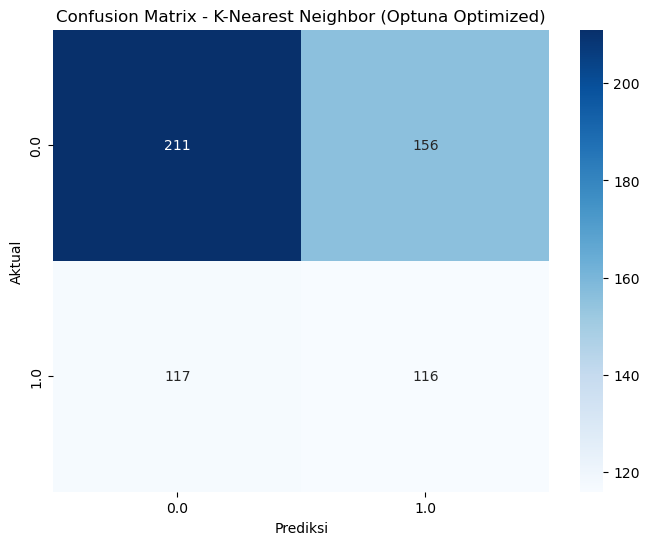

In [41]:
# Train and evaluate the best model found by Optuna
from sklearn.metrics import classification_report, confusion_matrix
# Train model with best parameters
best_knn = KNeighborsClassifier(**study_knn.best_params)
best_knn.fit(X_train_balanced, y_train_balanced)

# Evaluate
y_pred_knn_optuna = best_knn.predict(X_test_scaled)

print("\n--- Evaluasi Model K-Nearest Neighbor (Optuna Optimized) ---")
print(classification_report(y_test, y_pred_knn_optuna))

# Calculate training time
print(f"Training time: {time.time() - start_time:.2f} seconds")

# Confusion Matrix (Optimized K-Nearest Neighbor)
cm_knn_optuna = confusion_matrix(y_test, y_pred_knn_optuna)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_optuna, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title('Confusion Matrix - K-Nearest Neighbor (Optuna Optimized)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Nama & Anggota Kelompok

Kelompok 1
- Muhammad Abidzar Awwalin - 00000060520
  - Work Role:
    - EDA:
      - Show Correlation
      - Check Feature Distribution with WQI by Pollution Level
    - Create model with K-Nearest Neighbor
    - Hyperparameter tuning with Optuna for all methods.
    - Laporan
- Vivo Hizkia Immanuel - 00000060115
  - Work Role:
    - EDA:
      - Initial Data Inspection
      - Decriptive Statistics
    - Pre-processing
    - Laporan
- Jevon Chan Ho Kim - 00000061258
  - Work Role:
    - EDA:
      - Check Location & Date Columns
      - Check Categorical Columns
    - Create model with Random Forest
    - Create model with Random Forest + XGBoost
    - Laporan